<a href="https://colab.research.google.com/github/Ufelicita/mscproject/blob/main/Stock_Price_Prediction_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Mounting Google Drive

In this section, I am mounting Google Drive in Google Colab. This step is crucial as it allows for seamless access to files stored in Google Drive, enabling efficient data storage and retrieval throughout the project.

#### Workflow

 **Mounting the Drive**:
   - I begin by using the `drive.mount()` function from the `google.colab` module to mount Google Drive. This process creates a connection between the Colab environment and Google Drive, making it easy to load and save data directly from the Drive.



In [1]:
# Mount Google Drive in Google Colab for data storage and access
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Installing Required Libraries

In this section, I am installing the necessary libraries for the project. These libraries include tools for data analysis, machine learning, and hyperparameter tuning, which are essential for building and optimizing the model.

#### Workflow

**Installing Libraries**:
   - I begin by ensuring that all required libraries are installed in the Google Colab environment. This step is crucial as it sets up the environment with all the necessary tools for data processing, model building, and evaluation.

**Upgrading Libraries**:
   - To take advantage of the latest features and improvements, I also upgrade key libraries to their most recent versions. This helps in avoiding potential compatibility issues and ensures that the latest functionalities are available.

### Explanation of Each Library

**`yfinance`**:
   - This library provides an easy way to access financial data from Yahoo Finance, enabling the download of historical market data directly into Python for analysis.

**`ta`**:
   - A technical analysis library used to calculate various financial indicators, essential for analyzing market trends and patterns.

**`keras-tuner`**:
   - A tool designed for hyperparameter tuning in Keras/TensorFlow models, helping in the optimization of model performance by systematically searching for the best hyperparameters.

**`pyswarm`**:
   - This library implements particle swarm optimization, a technique useful for optimizing complex models, particularly in scenarios where traditional optimization methods might struggle.

**`scikit-learn`**:
   - A comprehensive machine learning library that offers tools for data preprocessing, model building, and evaluation, widely used for traditional machine learning tasks.

**`xgboost`**:
   - An efficient and flexible gradient boosting library, often used in machine learning competitions due to its performance and ability to handle large datasets effectively.

**`scikeras`**:
   - A wrapper that integrates Keras models with scikit-learn, allowing deep learning models to be used within scikit-learn pipelines, making it easier to combine traditional and deep learning approaches.

**`optuna`**:
   - A software framework for automatic hyperparameter optimization, designed to efficiently search for the best hyperparameters to improve model performance.

**`python-docx`**:
   - A library used for creating and modifying Microsoft Word documents (.docx), useful for generating reports and documentation directly from Python scripts.

### Conclusion

By installing and upgrading these libraries, I ensure that the Google Colab environment is fully equipped to handle the various tasks involved in this project. From data retrieval and preprocessing to model building and optimization, each library plays a vital role in the workflow, contributing to the overall success of the project.


In [2]:
# Install required libraries
!pip install yfinance ta keras-tuner pyswarm
!pip install --upgrade scikit-learn
!pip install --upgrade xgboost
!pip install scikeras
!pip install optuna
!pip install python-docx





  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 9.4 MB/s eta 0:00:00
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=9115324dc7eb2a85def55c27208415fd45c5496d772a5dac108d638b2d06d2dc
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=170d330990a506d52f80bb6579ea37d7b811d03e07ee5d82b387bb1a9e6dad4b
  Stored in directory: /root/.cache/pip/wheels/71/67/40/62fa158f497f942277cbab8199b05cb61c571ab324e67ad0d6
Successfully built ta pyswarm
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 103.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36

In [94]:
# Standard Python Libraries
import os
import pickle
import random
import datetime
import json
import tabulate
# Data Manipulation and Analysis
import numpy as np
import pandas as pd
import joblib


# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from IPython.display import Image, display


# Financial Data Retrieval
import yfinance as yf
from scipy.stats import uniform

# Machine Learning and Preprocessing
import sklearn
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import (
    train_test_split, TimeSeriesSplit, learning_curve, cross_val_score, KFold
)
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Technical Analysis
import ta
from ta.momentum import RSIIndicator
from ta.trend import MACD
from ta.volatility import BollingerBands
from ta.trend import SMAIndicator, EMAIndicator

# Deep Learning with TensorFlow and Keras
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
# Deep Learning with TensorFlow and Keras
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import (
    GlobalAveragePooling1D, LSTM, Dense, Input, Bidirectional, Dropout,
    BatchNormalization, LayerNormalization, Concatenate, Activation,
    Flatten, Attention
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import (
    TensorBoard, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
)
from tensorflow.keras.losses import Huber
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import plot_model, model_to_dot
from IPython.display import SVG
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model, register_keras_serializable
from tensorflow.keras.metrics import MeanAbsoluteError, RootMeanSquaredError
from tensorflow.keras.optimizers.schedules import ExponentialDecay


from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import (
    TensorBoard , EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
)
from tensorflow.keras.losses import Huber
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import plot_model, model_to_dot
from IPython.display import SVG
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model,register_keras_serializable
from tensorflow.keras.metrics import MeanAbsoluteError, RootMeanSquaredError
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras import regularizers

# Hyperparameter Tuning with Bayesian Optimization
from keras_tuner import BayesianOptimization
from keras.backend import clear_session
from tensorflow.keras import backend as K


# Optimization Utilities
from pyswarm import pso
import optuna

# Additional Libraries for Optimization and Ensemble Learning:
import xgboost as xgb



### Setting Random Seeds for Reproducibility

In this section, I am defining a function to set random seeds across various libraries to ensure reproducibility of results. Reproducibility is crucial in machine learning experiments, as it allows for consistent results across multiple runs, making the experimentation process more reliable.

#### Workflow

**Defining the Function**:
   - The `set_random_seeds` function is designed to set a consistent random seed across different libraries used in the project. By doing this, I ensure that all random number generators (RNGs) produce the same sequence of numbers, thereby making the model training and evaluation results reproducible.

**Setting the Seed**:
   - **NumPy RNG**: The seed for NumPy's random number generator is set to ensure consistency in data processing steps that rely on randomization, such as splitting datasets.
   - **Python's random RNG**: This controls the randomness in Python's standard library functions, ensuring consistent outcomes in tasks like shuffling data.
   - **TensorFlow RNG**: TensorFlow's random number generator is seeded to ensure that the neural network initialization and other random operations within TensorFlow produce the same results every time.
   - **XGBoost Configuration**: XGBoost’s verbosity is set to 0 to suppress unnecessary output, and the seed is set within the XGBoost parameters to ensure consistent model training outcomes.

**Initialization**:
   - After defining the function, I immediately call it to initialize the random seed. This ensures that all subsequent operations in the notebook are influenced by the set seed, maintaining consistency throughout the project.

### Conclusion

By setting random seeds across multiple libraries, I establish a controlled environment where the results of my experiments are consistent and reproducible. This step is fundamental in ensuring that any changes in model performance are due to modifications in the model or data, rather than randomness in the underlying processes.


In [4]:
# Function to set random seeds for reproducibility
def set_random_seeds(seed_value=42):
    """
    Configure random seed for reproducibility.
    Args:
    - seed_value: Seed for RNGs (default: 42).
    Returns:
    - None
    """
    # Set seed for numpy RNG
    np.random.seed(seed_value)

    # Set seed for Python's random RNG
    random.seed(seed_value)

    # Set seed for TensorFlow RNG
    tf.random.set_seed(seed_value)

    # Configure XGBoost verbosity to 0 (silent)
    xgb.set_config(verbosity=0)

    # Set seed for XGBoost parameters
    xgparam = {'seed': seed_value}

# Initialise random seed for consistency
set_random_seeds()


### Retrieving, Processing, and Combining Stock Data

This section is dedicated to the acquisition, processing, and combination of historical stock data from multiple tickers. The aim is to prepare datasets that will be used for training, testing, and validating machine learning models in subsequent steps.

#### Workflow

**Data Retrieval**:
   - The process begins by downloading historical stock data for a list of specified tickers from Yahoo Finance. The data covers a defined date range, and it includes important financial metrics, such as the adjusted closing prices. This data is saved to a local directory as CSV files, ensuring that it can be accessed quickly in future runs without the need for re-downloading.

**Data Processing**:
   - Once the raw data is retrieved, it is cleaned and refined to retain only the essential columns, specifically the 'Date' and 'Adjusted Close' prices. The adjusted close prices are then renamed to match the ticker symbols, making it easier to distinguish between different stocks when the data is combined into a single dataset.

**Combining Data**:
   - After processing the data for each ticker, the individual datasets are merged into a single DataFrame, using the 'Date' column as the key. This results in a consolidated dataset where each column represents the adjusted close prices of different stocks, all aligned by date. This combined dataset is crucial for the next steps in analysis and modeling.

**Managing Different Datasets**:
   - The data is segmented into three distinct datasets: one for training, another for testing, and an extra dataset for additional validation. These datasets are carefully partitioned by date to ensure that there is no overlap between them, which is critical for maintaining the validity of the training and evaluation processes.

**Tracking Data Points**:
   - Throughout the process, the number of data points is tracked before and after processing for each ticker. This tracking helps ensure the completeness of the data and highlights any discrepancies that might arise during processing. The data points information is recorded for each ticker, providing transparency and facilitating quality control.

### Conclusion

By following this methodical approach, I have successfully created clean and well-organized datasets that are ready for use in machine learning tasks. The careful segmentation into training, testing, and validation sets ensures that the models developed later will be properly evaluated, leading to more reliable and generalizable results. This meticulous preparation is key to building robust machine learning models that perform well in real-world scenarios.


In [9]:
def fetch_data(ticker, start, end, output_dir):
    """
    Fetch and save stock data for a ticker.
    Args:
    - ticker (str): Stock ticker symbol.
    - start (str): Start date (YYYY-MM-DD).
    - end (str): End date (YYYY-MM-DD).
    - output_dir (str): Directory to save data.
    Returns:
    - pd.DataFrame: Loaded data for ticker.
    - int: Number of rows in the downloaded data.
    """
    # Ensure output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Define file path for the data
    file_path = os.path.join(output_dir, f"{ticker}.csv")

    # Download data
    if not os.path.exists(file_path):
        data = yf.download(ticker, start=start, end=end)
        data.reset_index(inplace=True)  # Ensure 'Date' is a column
        data.to_csv(file_path, index=False)  # Save without index
    else:
        data = pd.read_csv(file_path)

    # Return the data as DataFrame and its row count
    return data, data.shape[0]

# Function to process data
def process_data(df, ticker):
    """
    Process data: keep 'Adj Close', rename.
    Args:
    - df (pd.DataFrame): Stock data.
    - ticker (str): Stock ticker symbol.
    Returns:
    - pd.DataFrame: Processed data with 'Adj Close'.
    - int: Number of rows after processing.
    """
    # Convert 'Date' to datetime format
    df['Date'] = pd.to_datetime(df['Date'])

    # Keep only 'Date' and 'Adj Close' columns
    df = df[['Date', 'Adj Close']]

    # Rename 'Adj Close' to ticker symbol
    df = df.rename(columns={'Adj Close': ticker})

    # Return the processed DataFrame and its row count
    return df, df.shape[0]

# Function to download and process data
def download_and_process_data(tickers, start, end, out_dir):
    """
    Download and process stock data.
    Args:
    - tickers (list): List of stock tickers.
    - start (str): Start date (YYYY-MM-DD).
    - end (str): End date (YYYY-MM-DD).
    - out_dir (str): Directory to save data.
    Returns:
    - pd.DataFrame: Combined data for tickers.
    - dict: Dictionary of ticker with data points before and after processing.
    """
    # Initialize empty DataFrame
    combined_df = None

    # Initialize a dictionary to store data points information
    data_points_info = {}

    # Loop through each ticker
    for ticker in tickers:
        # Fetch raw data
        raw_df, raw_count = fetch_data(ticker, start, end, out_dir)

        # Process data for current ticker
        processed_df, processed_count = process_data(raw_df,
                                                     ticker.split('.')[0])

        # Record the data points information
        data_points_info[ticker] = {
            'before_processing': raw_count,
            'after_processing': processed_count
        }

        # Merge processed data with combined_df
        combined_df = (processed_df if combined_df is None
                       else pd.merge(combined_df, processed_df,
                                     on='Date', how='inner'))

    # Return the combined DataFrame and the data points info
    return combined_df, data_points_info

# Define the tickers for each dataset
tickers_train = ['RMV.L', 'BDEV.L', 'SBRY.L', 'BATS.L', 'BT-A.L', 'SGRO.L',
                 'IMB.L', 'TSCO.L', 'DGE.L', 'VOD.L']
tickers_test = ['SHEL.L', 'PSON.L', 'ULVR.L', 'REL.L', 'UU.L', 'SSE.L',
                'SGE.L', 'AHT.L', 'LAND.L', 'AZN.L']
tickers_extra = ['SVT.L', 'SMT.L', 'RKT.L', 'SMDS.L', 'PHNX.L', 'NG.L',
                 'TW.L', 'GSK.L', 'HIK.L', 'MNDI.L']

# Set date range to avoid overlap between Test and Extra datasets
date_train = ('2014-01-02', '2023-12-29')
date_test = ('2024-01-02', '2024-03-28')
date_extra = ('2024-04-02', '2024-08-28')

# Directories for saving data
dirs = ('train_data_', 'test_data_', 'extra_data_')

# Download and process training data
combined_train_data, train_data_points = \
download_and_process_data(tickers_train, *date_train, dirs[0])

# Download and process test data
combined_test_data, test_data_points =\
 download_and_process_data(tickers_test, *date_test, dirs[1])

# Download and process extra data
combined_extra_data, extra_data_points = \
download_and_process_data(tickers_extra, *date_extra, dirs[2])

# Print first few rows of each dataset
print(combined_train_data.head())
print(combined_test_data.head())
print(combined_extra_data.head())

# Print the data points information
print("Training Data Points:", train_data_points)
print("Test Data Points:", test_data_points)
print("Extra Data Points:", extra_data_points)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

        Date    RMV   BDEV   SBRY    BATS   BT-A   SGRO     IMB   TSCO  \
0 2014-01-02 241.10 225.90 223.51 1680.69 237.63 220.34 1010.86 264.85   
1 2014-01-03 242.07 228.25 227.53 1676.76 238.70 220.41 1008.70 261.80   
2 2014-01-06 246.73 234.70 223.76 1679.64 240.88 222.21 1012.15 263.15   
3 2014-01-07 246.46 236.03 224.43 1669.16 240.07 222.61  997.92 262.79   
4 2014-01-08 238.46 232.48 219.01 1652.92 237.01 225.20  969.03 260.06   

      DGE    VOD  
0 1498.62 115.62  
1 1488.51 114.89  
2 1481.39 114.92  
3 1472.40 115.97  
4 1452.54 115.04  
        Date    SHEL   PSON    ULVR     REL      UU     SSE     SGE     AHT  \
0 2024-01-02 2486.36 945.80 3729.05 3028.15 1009.69 1778.92 1145.12 5256.05   
1 2024-01-03 2503.26 949.71 3756.84 3023.21 1019.36 1771.18 1131.36 5202.88   
2 2024-01-04 2504.71 961.05 3746.60 3067.64 1028.55 1786.67 1127.92 5165.46   
3 2024-01-05 2482.02 953.23 3733.44 3060.73 1022.75 1798.28 1118.10 5019.74   
4 2024-01-08 2404.79 958.51 3736.36 3099.24 10

### Verifying Date Overlaps Between Datasets

In this section, I implement a function to verify whether there are any overlapping dates between the training, testing, and extra validation datasets. Ensuring that there are no overlaps is critical to prevent data leakage, which could lead to inaccurate model performance evaluations.

#### Workflow

**Function Overview**:
   - The `check_date_overlap` function is designed to compare the date ranges across the different datasets (training, testing, and extra validation). By identifying any overlapping dates, we can ensure that each dataset remains distinct, which is essential for the validity of the machine learning experiments.

**Date Set Conversion**:
   - The dates from each dataset are converted into sets, which allows for efficient comparison using set operations. This approach is both straightforward and effective for identifying any common dates between the datasets.

**Overlap Detection**:
   - **Train vs. Test**: The function checks for any overlapping dates between the training and testing datasets.
   - **Train vs. Extra**: It also verifies whether the training data shares any dates with the extra validation data.
   - **Test vs. Extra**: Finally, the function checks for overlaps between the test and extra validation datasets.

**Output**:
   - If any overlaps are detected, they are printed out, clearly showing which dates are common across the datasets. This immediate feedback allows for quick identification and correction of any issues.

### Conclusion

By running this overlap check, I ensure that the datasets used for training, testing, and validation are entirely separate. This step is crucial to maintain the integrity of the model evaluation process, as it ensures that the model is tested on unseen data, providing a true measure of its generalization ability.


In [12]:
def check_date_overlap(train_dates, test_dates, extra_dates):
    """
    Check for overlaps between train, test, and extra data dates.

    Args:
    - train_dates (pd.Index): Dates in the training set.
    - test_dates (pd.Index): Dates in the test set.
    - extra_dates (pd.Index): Dates in the extra set.

    Returns:
    - None: Prints the overlap information.
    """
    train_set = set(train_dates)
    test_set = set(test_dates)
    extra_set = set(extra_dates)

    overlap_train_test = train_set.intersection(test_set)
    overlap_train_extra = train_set.intersection(extra_set)
    overlap_test_extra = test_set.intersection(extra_set)

    print("Overlap between Train and Test:", overlap_train_test)
    print("Overlap between Train and Extra:", overlap_train_extra)
    print("Overlap between Test and Extra:", overlap_test_extra)


check_date_overlap(combined_train_data['Date'], combined_test_data['Date'],
                   combined_extra_data['Date'])

Overlap between Train and Test: set()
Overlap between Train and Extra: set()
Overlap between Test and Extra: set()


### Setting Random Seeds for Reproducibility

In this initial step, a function is defined to set random seeds for reproducibility. Ensuring reproducibility is crucial in data science and machine learning because it allows experiments to be consistently replicated.

#### Workflow

**Setting the Random Seed**:
   - The `set_random_seeds` function initializes the random seed across different components like NumPy. This ensures that any stochastic processes (e.g., random number generation) yield the same results across multiple runs, making the analysis and modeling process consistent and reliable.

### Performing Exploratory Data Analysis (EDA)

This section is focused on performing Exploratory Data Analysis (EDA) on the stock data that has been downloaded and processed. EDA helps in understanding the dataset's underlying structure, identifying patterns, and detecting any anomalies or missing data.

#### Workflow

**Creating Output Directories**:
   - The function first ensures that the necessary directories for saving the EDA results are created. This organization step is essential for maintaining a clean workflow where all outputs are stored systematically.

**Generating Basic Statistical Summaries**:
   - The `perform_eda` function computes basic statistical summaries for the dataset, including measures like mean, standard deviation, and quartiles. These summaries help in quickly grasping the distribution and central tendencies of the data.

**Checking for Missing Values**:
   - The function checks for missing data, which is a crucial step because missing values can lead to biased analyses and affect model performance if not properly handled.

**Correlation Analysis and Visualization**:
   - The function also generates a correlation matrix to understand the relationships between different stock tickers. This matrix is visualized as a heatmap, providing a quick and intuitive way to identify strong correlations or the lack thereof.

### Downloading and Processing Stock Data

In this section, historical stock data for specified tickers is downloaded and processed. The data is then combined into comprehensive datasets that are ready for analysis.

#### Workflow

**Data Download and Processing**:
   - The `download_and_process_data` function downloads historical stock data for each specified ticker from Yahoo Finance. The data is then processed by selecting only the relevant columns (Date and Adjusted Close prices) and merged into a single DataFrame. This combined dataset facilitates further analysis by aligning the data across all tickers based on the date.

### Conducting EDA on Different Datasets

After downloading and processing the data, EDA is performed on the training, testing, and extra datasets. This step is crucial for gaining insights into the data before any modeling is done.

#### Workflow

**Executing EDA**:
   - The `perform_eda` function is executed on each dataset (training, testing, and extra). This involves generating summary statistics, checking for missing values, and creating heatmaps of correlations. These analyses provide a deeper understanding of the data, highlighting important features and potential issues.

**Saving Processed Data**:
   - After performing EDA, the processed datasets are saved as CSV files. This step ensures that the data is clean, well-understood, and ready for use in the modeling phase.

### Conclusion

This section sets the foundation for reliable and robust data analysis by ensuring reproducibility, performing thorough exploratory data analysis, and preparing well-structured datasets. These steps are crucial for building accurate and interpretable machine learning models in the subsequent phases of the project.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%*******


Performing EDA...

Basic Stats (Train):
          count    mean    std     min     25%     50%     75%     max
RMV.L  2521.00  449.07 137.01  176.63  358.88  453.49  559.49  768.13
BDEV.L 2521.00  413.56  95.67  213.24  358.82  409.10  456.61  691.06
SBRY.L 2521.00  194.60  33.63  139.69  168.80  185.14  218.77  290.60
BATS.L 2521.00 2327.68 414.23 1509.61 2011.60 2200.62 2690.62 3410.24
BT-A.L 2521.00  185.18  65.62   82.11  131.35  169.05  242.01  328.47
SGRO.L 2521.00  593.93 283.52  220.34  318.61  545.94  784.13 1315.91
IMB.L  2521.00 1457.12 281.69  884.46 1217.78 1469.59 1673.43 2038.34
TSCO.L 2521.00  197.19  37.66  114.84  167.07  198.29  225.24  282.79
DGE.L  2521.00 2373.70 734.79 1294.40 1603.44 2354.12 2997.01 3787.66
VOD.L  2521.00   99.17  17.20   60.92   86.74   99.93  112.98  137.79

Missing Values (Train):
 Date      0
RMV.L     0
BDEV.L    0
SBRY.L    0
BATS.L    0
BT-A.L    0
SGRO.L    0
IMB.L     0
TSCO.L    0
DGE.L     0
VOD.L     0
dtype: int64

Correlation Matr

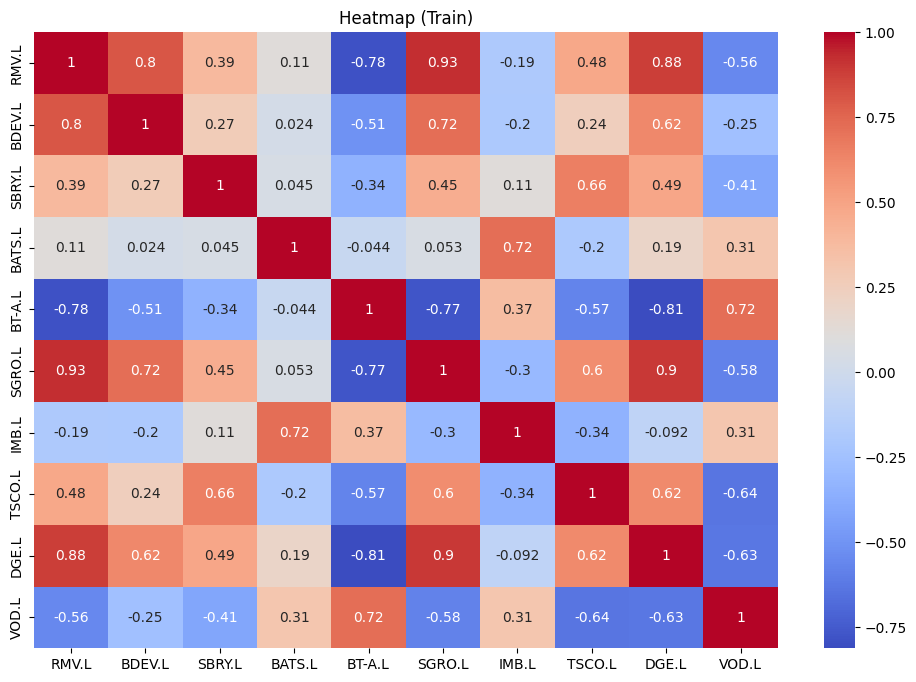


Basic Stats (Test):
         count     mean    std     min      25%      50%      75%      max
SHEL.L  62.00  2418.70  73.33 2279.77  2385.48  2410.05  2447.56  2586.63
PSON.L  62.00   958.51  31.91  911.39   936.32   946.97   985.90  1030.15
ULVR.L  62.00  3800.44  93.11 3601.81  3738.92  3802.45  3885.30  3953.31
REL.L   62.00  3281.35 110.72 3023.21  3221.92  3293.25  3367.79  3459.62
UU.L    62.00  1007.76  13.45  983.10   996.15  1009.93  1019.36  1031.45
SSE.L   62.00  1632.30  85.69 1513.52  1563.42  1615.76  1701.74  1822.96
SGE.L   62.00  1184.70  41.27 1118.10  1148.92  1169.28  1220.45  1273.59
AHT.L   62.00  5162.58 242.03 4705.56  5017.31  5168.96  5311.15  5654.17
LAND.L  62.00   621.64  21.09  592.93   604.26   615.08   634.38   675.32
AZN.L   62.00 10207.07 308.13 9297.08 10105.82 10228.65 10375.16 10676.31

Missing Values (Test):
 Date      0
SHEL.L    0
PSON.L    0
ULVR.L    0
REL.L     0
UU.L      0
SSE.L     0
SGE.L     0
AHT.L     0
LAND.L    0
AZN.L     0
dtype: 

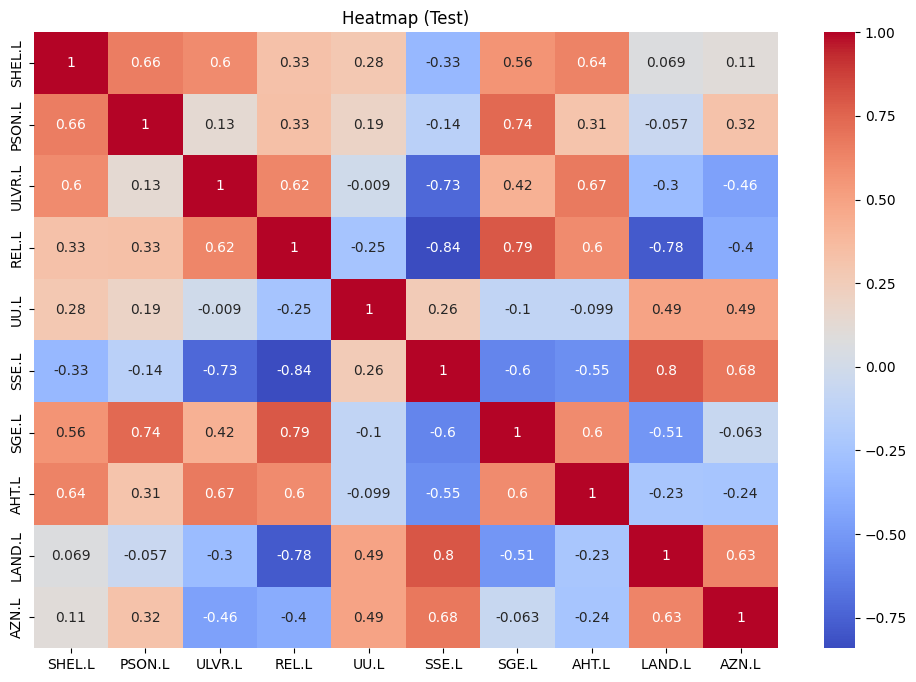


Basic Stats (Extra):
         count    mean    std     min     25%     50%     75%     max
SVT.L  103.00 2460.12  91.93 2280.87 2394.21 2470.00 2529.67 2715.00
SMT.L  103.00  867.88  28.17  768.00  850.20  876.17  890.30  904.80
RKT.L  103.00 4271.23 129.75 4014.24 4178.03 4283.94 4362.40 4529.13
SMDS.L 103.00  402.04  40.48  340.00  366.20  402.60  442.30  477.00
PHNX.L 103.00  517.60  23.59  476.00  495.70  519.50  536.00  565.50
NG.L   103.00  956.70  64.19  802.02  899.90  976.00  993.59 1092.93
TW.L   103.00  147.33  10.06  129.90  141.60  148.30  155.75  165.85
GSK.L  103.00 1601.30  85.35 1483.93 1530.25 1593.40 1624.76 1780.62
HIK.L  103.00 1888.50  80.60 1746.81 1822.63 1889.59 1947.19 2074.00
MNDI.L 103.00 1482.92  64.15 1311.17 1442.04 1494.45 1536.52 1578.60

Missing Values (Extra):
 Date      0
SVT.L     0
SMT.L     0
RKT.L     0
SMDS.L    0
PHNX.L    0
NG.L      0
TW.L      0
GSK.L     0
HIK.L     0
MNDI.L    0
dtype: int64

Correlation Matrix (Extra):
         SVT.L  SM

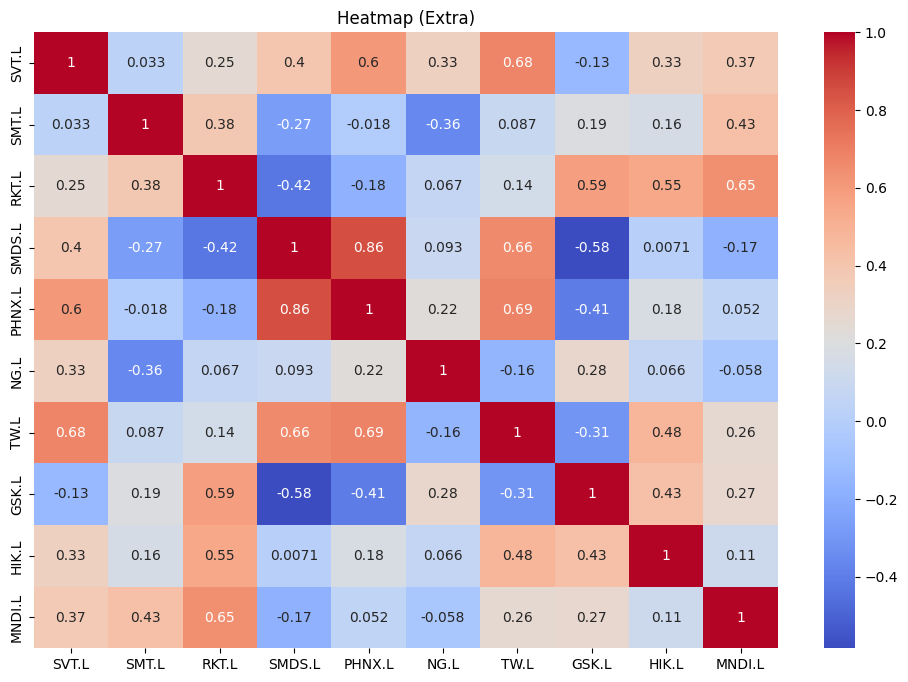

In [18]:


# Set random seeds for reproducibility
def set_random_seeds(seed=42):
    """
    Set a random seed for reproducibility.

    Args:
    - seed (int): Random seed value. Default is 42.
    """
    np.random.seed(seed)

set_random_seeds()

def perform_eda(df, data_type, output_dir):
    """
    Perform EDA and save results.

    Args:
    - df (pd.DataFrame): Stock data.
    - data_type (str): 'Train', 'Test', or 'Extra'.
    - output_dir (str): Directory to save results.
    """
    # Create directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Remove the 'Date' column for summary stats
    df_no_date = df.drop(columns=['Date'])

    # Display and save basic statistics
    basic_stats = df_no_date.describe().T
    pd.options.display.float_format = "{:.2f}".format
    print(f"\nBasic Stats ({data_type}):\n", basic_stats)
    for col in basic_stats.columns:
        stats = basic_stats[[col]]
        stats.to_excel(os.path.join(
            output_dir, f'stats_{data_type.lower()}_{col}.xlsx'))

    # Display missing values
    print(f"\nMissing Values ({data_type}):\n", df.isnull().sum())

    # Correlation matrix and heatmap
    corr_matrix = df_no_date.corr()
    print(f"\nCorrelation Matrix ({data_type}):\n", corr_matrix)

    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title(f'Heatmap ({data_type})')
    plt.savefig(os.path.join(output_dir, f'heatmap_{data_type.lower()}.png'), dpi=300)
    plt.show()


def download_and_process_data(tickers, start, end):
    """
    Download and merge stock data.

    Args:
    - tickers (list): List of stock tickers.
    - start (str): Start date (YYYY-MM-DD).
    - end (str): End date (YYYY-MM-DD).

    Returns:
    - pd.DataFrame: Combined data for all tickers.
    """
    combined_df = None
    for ticker in tickers:
        # Download data
        df = yf.download(ticker, start=start, end=end)
        df.reset_index(inplace=True)
        df = df[['Date', 'Adj Close']]
        df = df.rename(columns={'Adj Close': ticker})

        # Merge with previous data
        if combined_df is None:
            combined_df = df
        else:
            combined_df = pd.merge(combined_df, df, on='Date', how='inner')

    return combined_df

# Define the tickers for each dataset
tickers_train = ['RMV.L', 'BDEV.L', 'SBRY.L', 'BATS.L', 'BT-A.L', 'SGRO.L',
                 'IMB.L', 'TSCO.L', 'DGE.L', 'VOD.L']
tickers_test = ['SHEL.L', 'PSON.L', 'ULVR.L', 'REL.L', 'UU.L', 'SSE.L',
                'SGE.L', 'AHT.L', 'LAND.L', 'AZN.L']
tickers_extra = ['SVT.L', 'SMT.L', 'RKT.L', 'SMDS.L', 'PHNX.L', 'NG.L',
                 'TW.L', 'GSK.L', 'HIK.L', 'MNDI.L']

# Set date range
date_train = ('2014-01-02', '2023-12-29')
date_test = ('2024-01-02', '2024-03-28')
date_extra = ('2024-04-02', '2024-08-28')

# Output directories
output_dir_train = 'output/train_data'
output_dir_test = 'output/test_data'
output_dir_extra = 'output/extra_data'

# Download and process data
print("\nDownloading and processing data...")
train_data = download_and_process_data(tickers_train, *date_train)
test_data = download_and_process_data(tickers_test, *date_test)
extra_data = download_and_process_data(tickers_extra, *date_extra)

# Perform EDA on datasets
print("\nPerforming EDA...")
perform_eda(train_data, 'Train', output_dir_train)
perform_eda(test_data, 'Test', output_dir_test)
perform_eda(extra_data, 'Extra', output_dir_extra)

# Save processed data to CSV
train_data.to_csv(os.path.join(output_dir_train, 'train_data.csv'), index=False)
test_data.to_csv(os.path.join(output_dir_test, 'test_data.csv'), index=False)
extra_data.to_csv(os.path.join(output_dir_extra, 'extra_data.csv'), index=False)


### Calculating and Visualizing Log Returns and Adjusted Close Prices

This section is dedicated to calculating the log returns for stock prices and visualizing both the log returns and adjusted close prices using time series plots and box plots. These visualizations provide critical insights into the behavior of stock prices over time, helping identify trends, patterns, and potential outliers.

#### Workflow

**Calculating Log Returns**:
   - The `calculate_log_returns` function is used to compute the log returns for each stock ticker in the dataset. Log returns are a preferred method in financial analysis because they account for compounding effects and are more stable over time.
   - The function iterates over each column (excluding the 'Date' column) in the DataFrame and calculates the log return by taking the natural logarithm of the ratio of consecutive adjusted close prices. The resulting DataFrame retains the 'Date' column and includes the computed log returns for each ticker.

**Visualizing Log Returns with Time Series Plots**:
   - The `plot_log_returns` function creates time series plots of the log returns for each stock ticker. The plots are organized into subplots, with three plots per row, making it easier to compare the log returns across different stocks.
   - Each subplot is well-labeled, with titles, axis labels, and legends to ensure clarity. The x-axis labels are rotated for better readability, and any unused subplots are removed to keep the visualization clean and focused.

**Creating Box Plots for Adjusted Close Prices**:
   - The `plot_box_plots` function generates box plots for the adjusted close prices of each stock ticker. Box plots are a valuable tool for detecting outliers and understanding the distribution of prices.
   - Similar to the log returns plots, the box plots are arranged in a grid with three plots per row. The y-axis label includes the currency and scale, providing context for the price data. Any unused subplots are removed, and the layout is adjusted to prevent overlapping, ensuring that the plots are clear and easy to interpret.

### Application to Different Datasets

**Training Data**:
   - Log returns are calculated for the training dataset, followed by the generation of time series plots to visualize these returns. Additionally, box plots are created to examine the distribution and identify any outliers in the adjusted close prices.

**Testing Data**:
   - The same process is applied to the testing dataset, with log returns calculated and visualized through time series plots. Box plots are also generated to analyze the adjusted close prices in the testing data.

**Extra Validation Data**:
   - Finally, the log returns for the extra validation dataset are calculated and visualized. Box plots for the adjusted close prices are created to complete the analysis, ensuring that all datasets are thoroughly examined.

### Conclusion

By calculating and visualizing log returns alongside adjusted close prices, valuable insights are gained into the behavior of stock prices over time. The time series plots of log returns highlight trends and volatility, while the box plots help identify outliers and the overall distribution of prices. This analysis provides a solid foundation for further modeling and forecasting tasks, ensuring that the data is well-understood and ready for more advanced analysis.


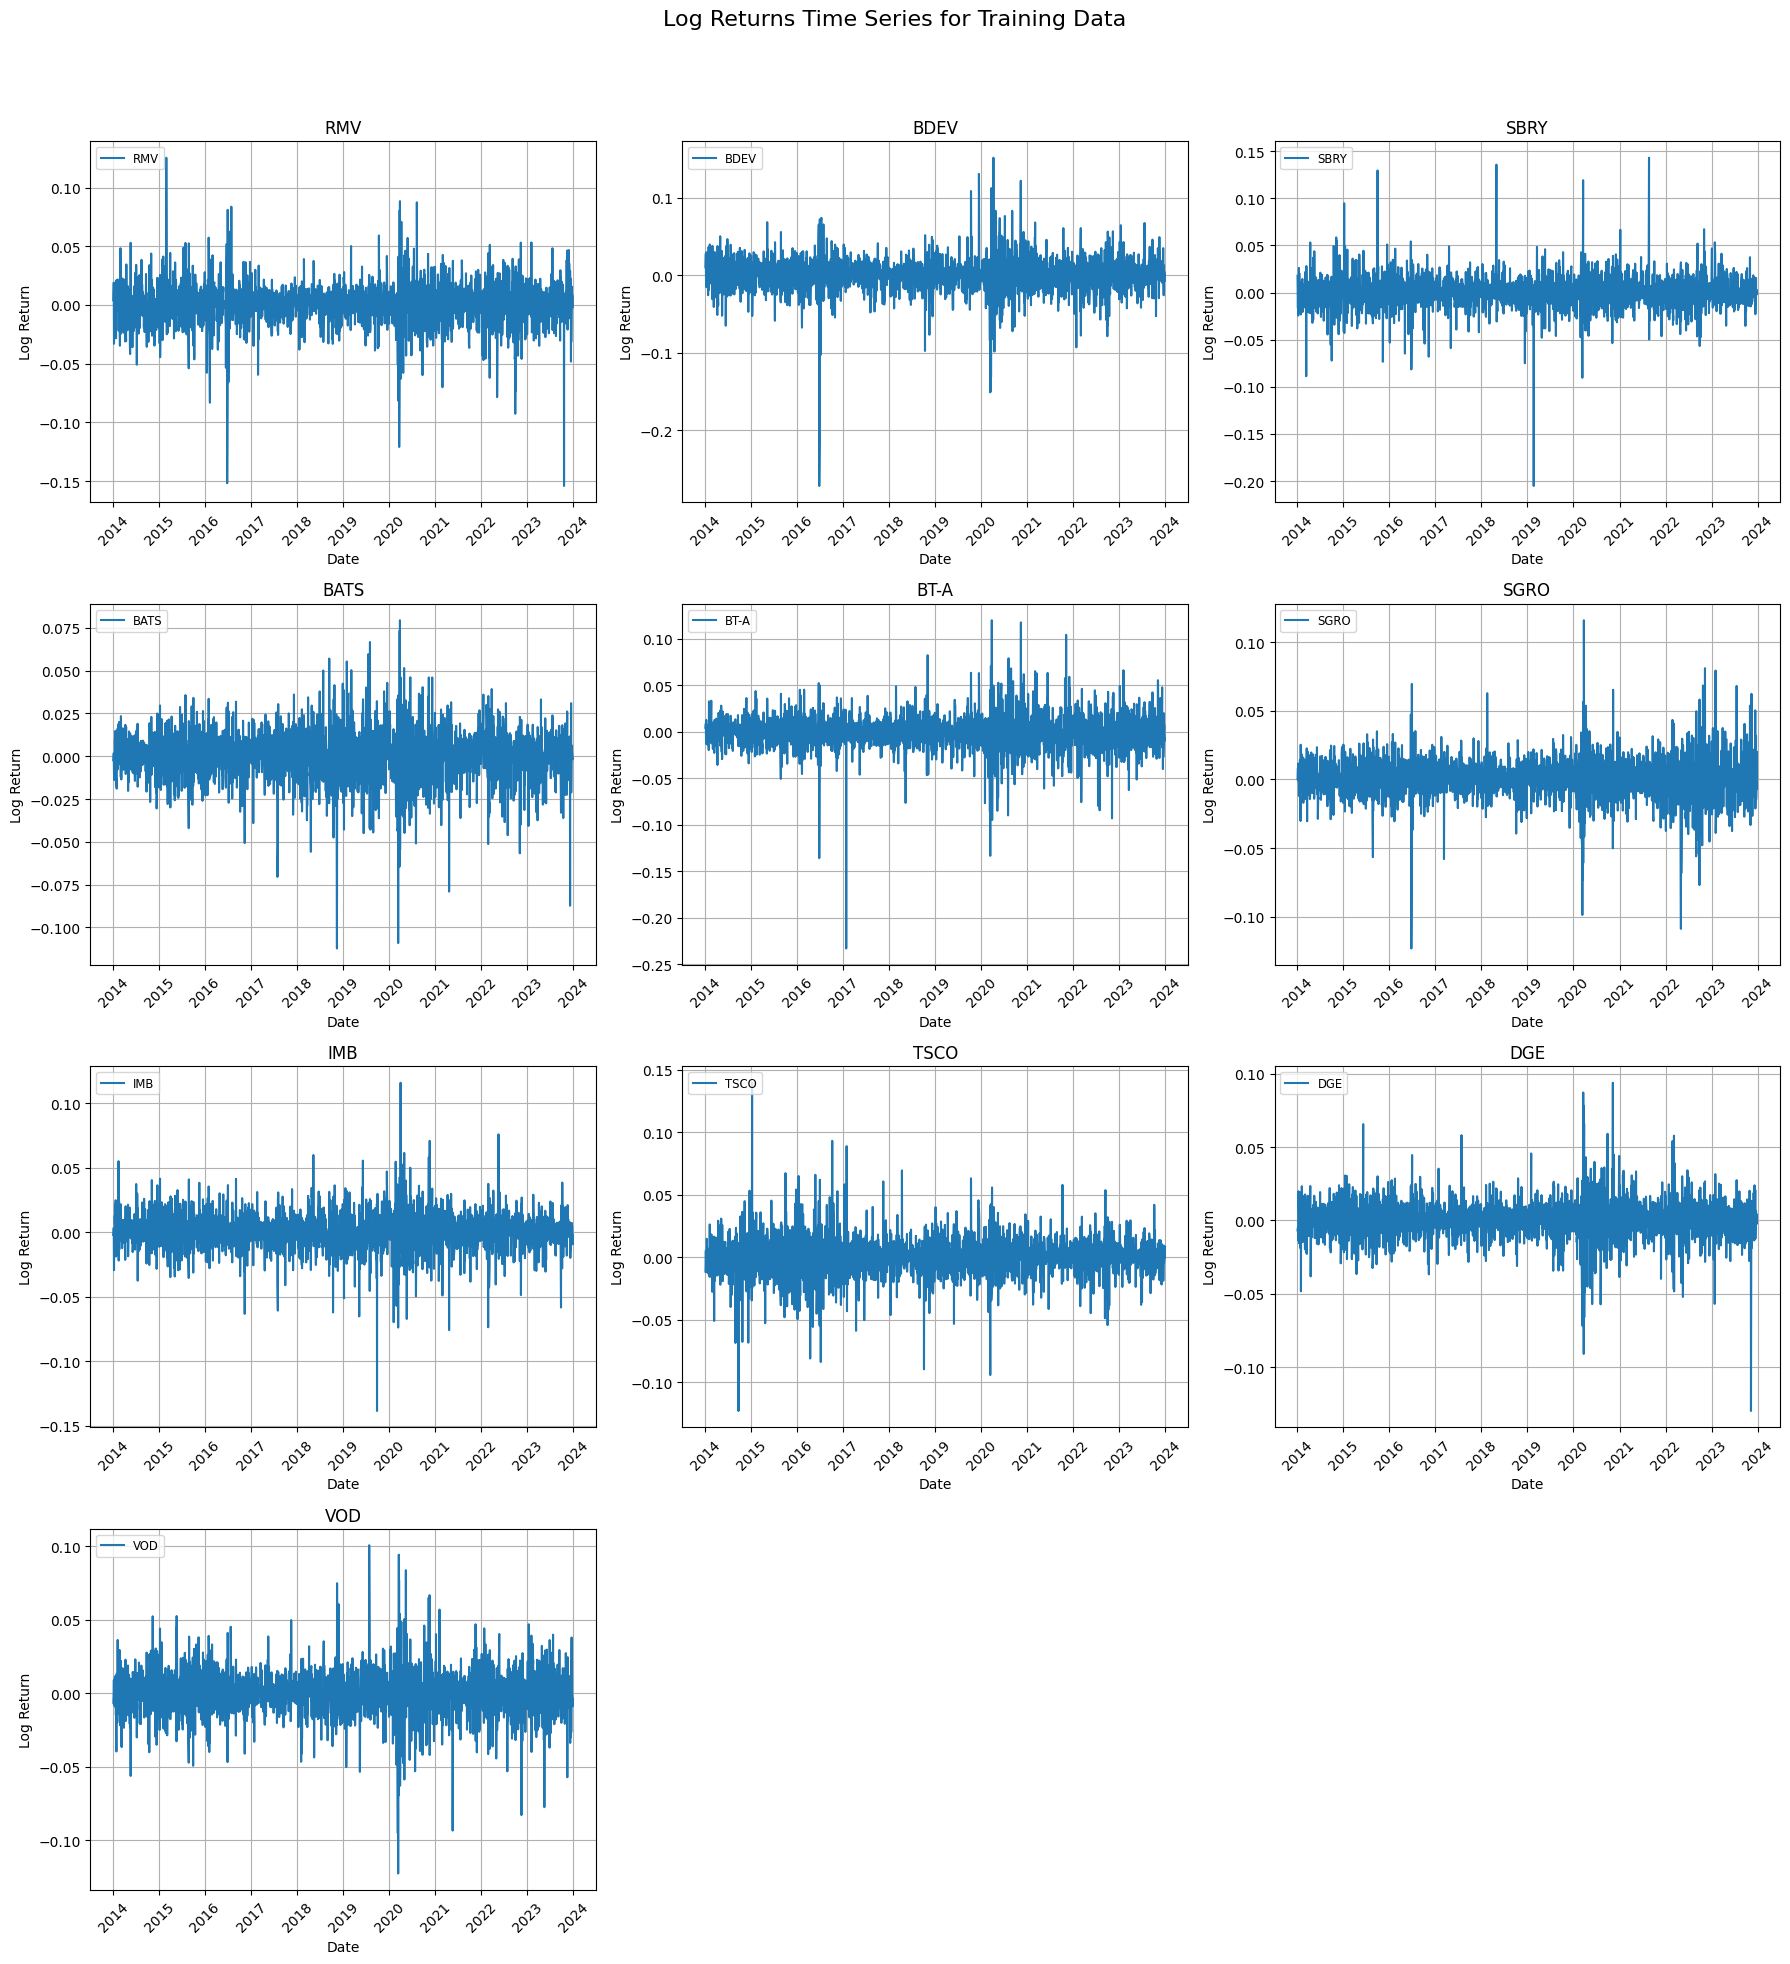

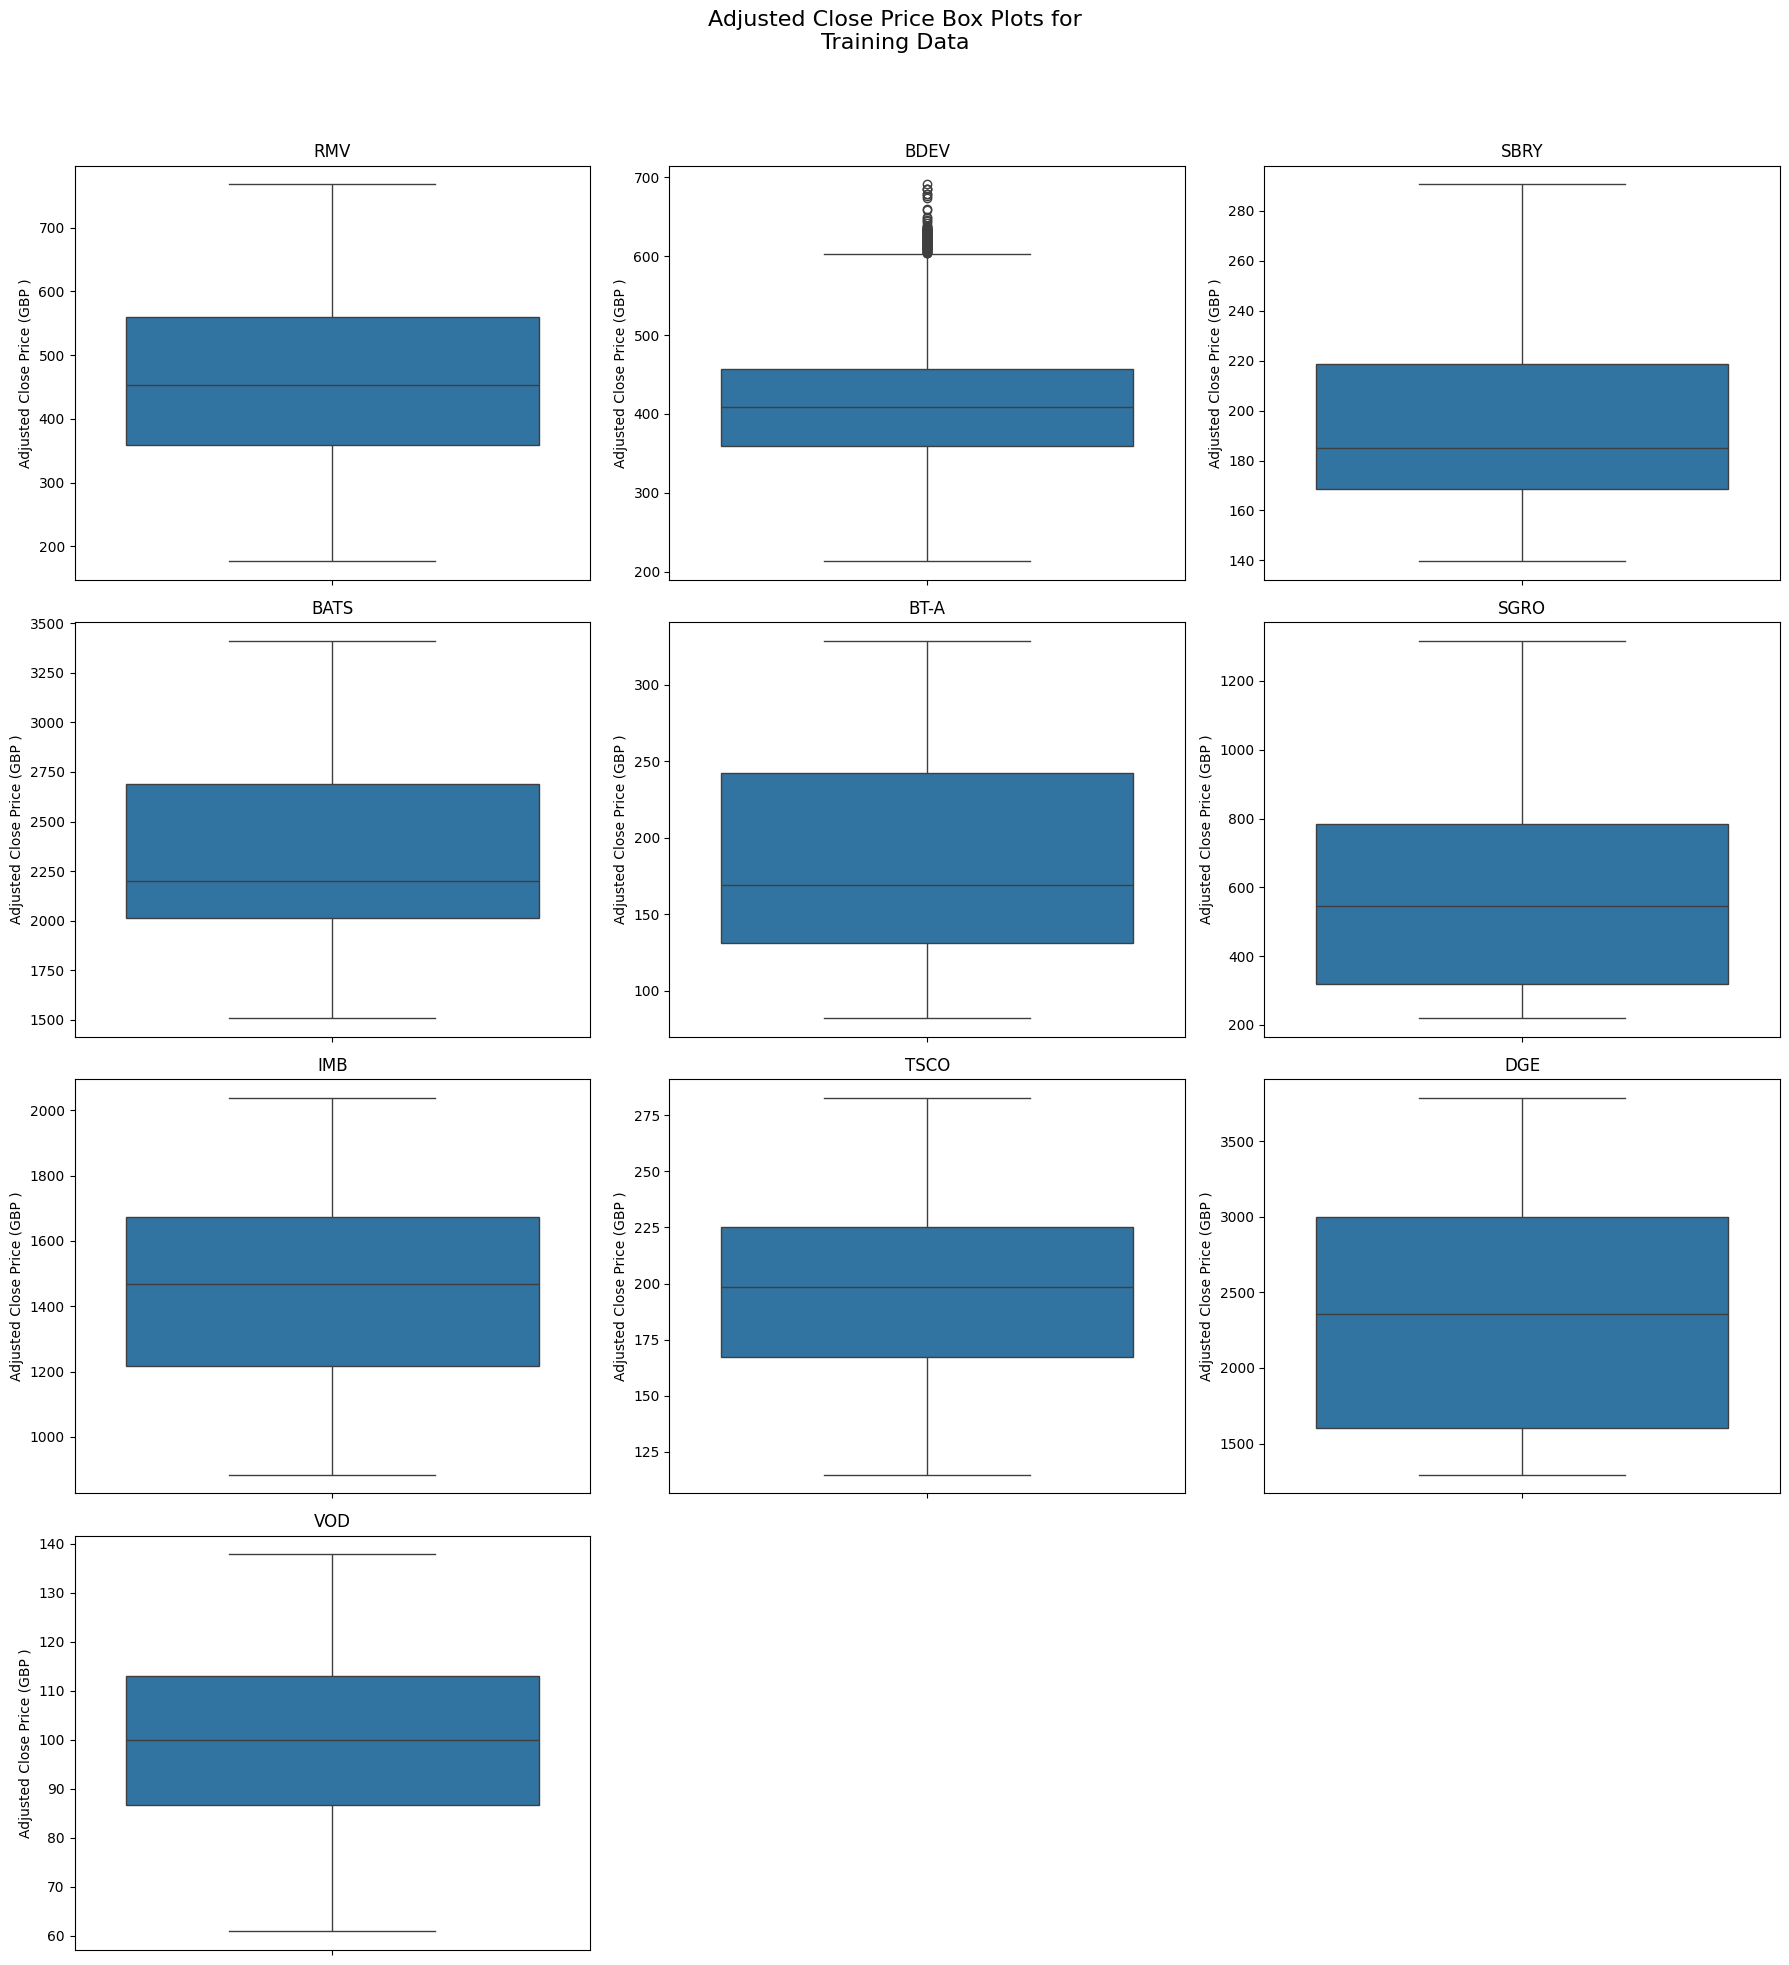

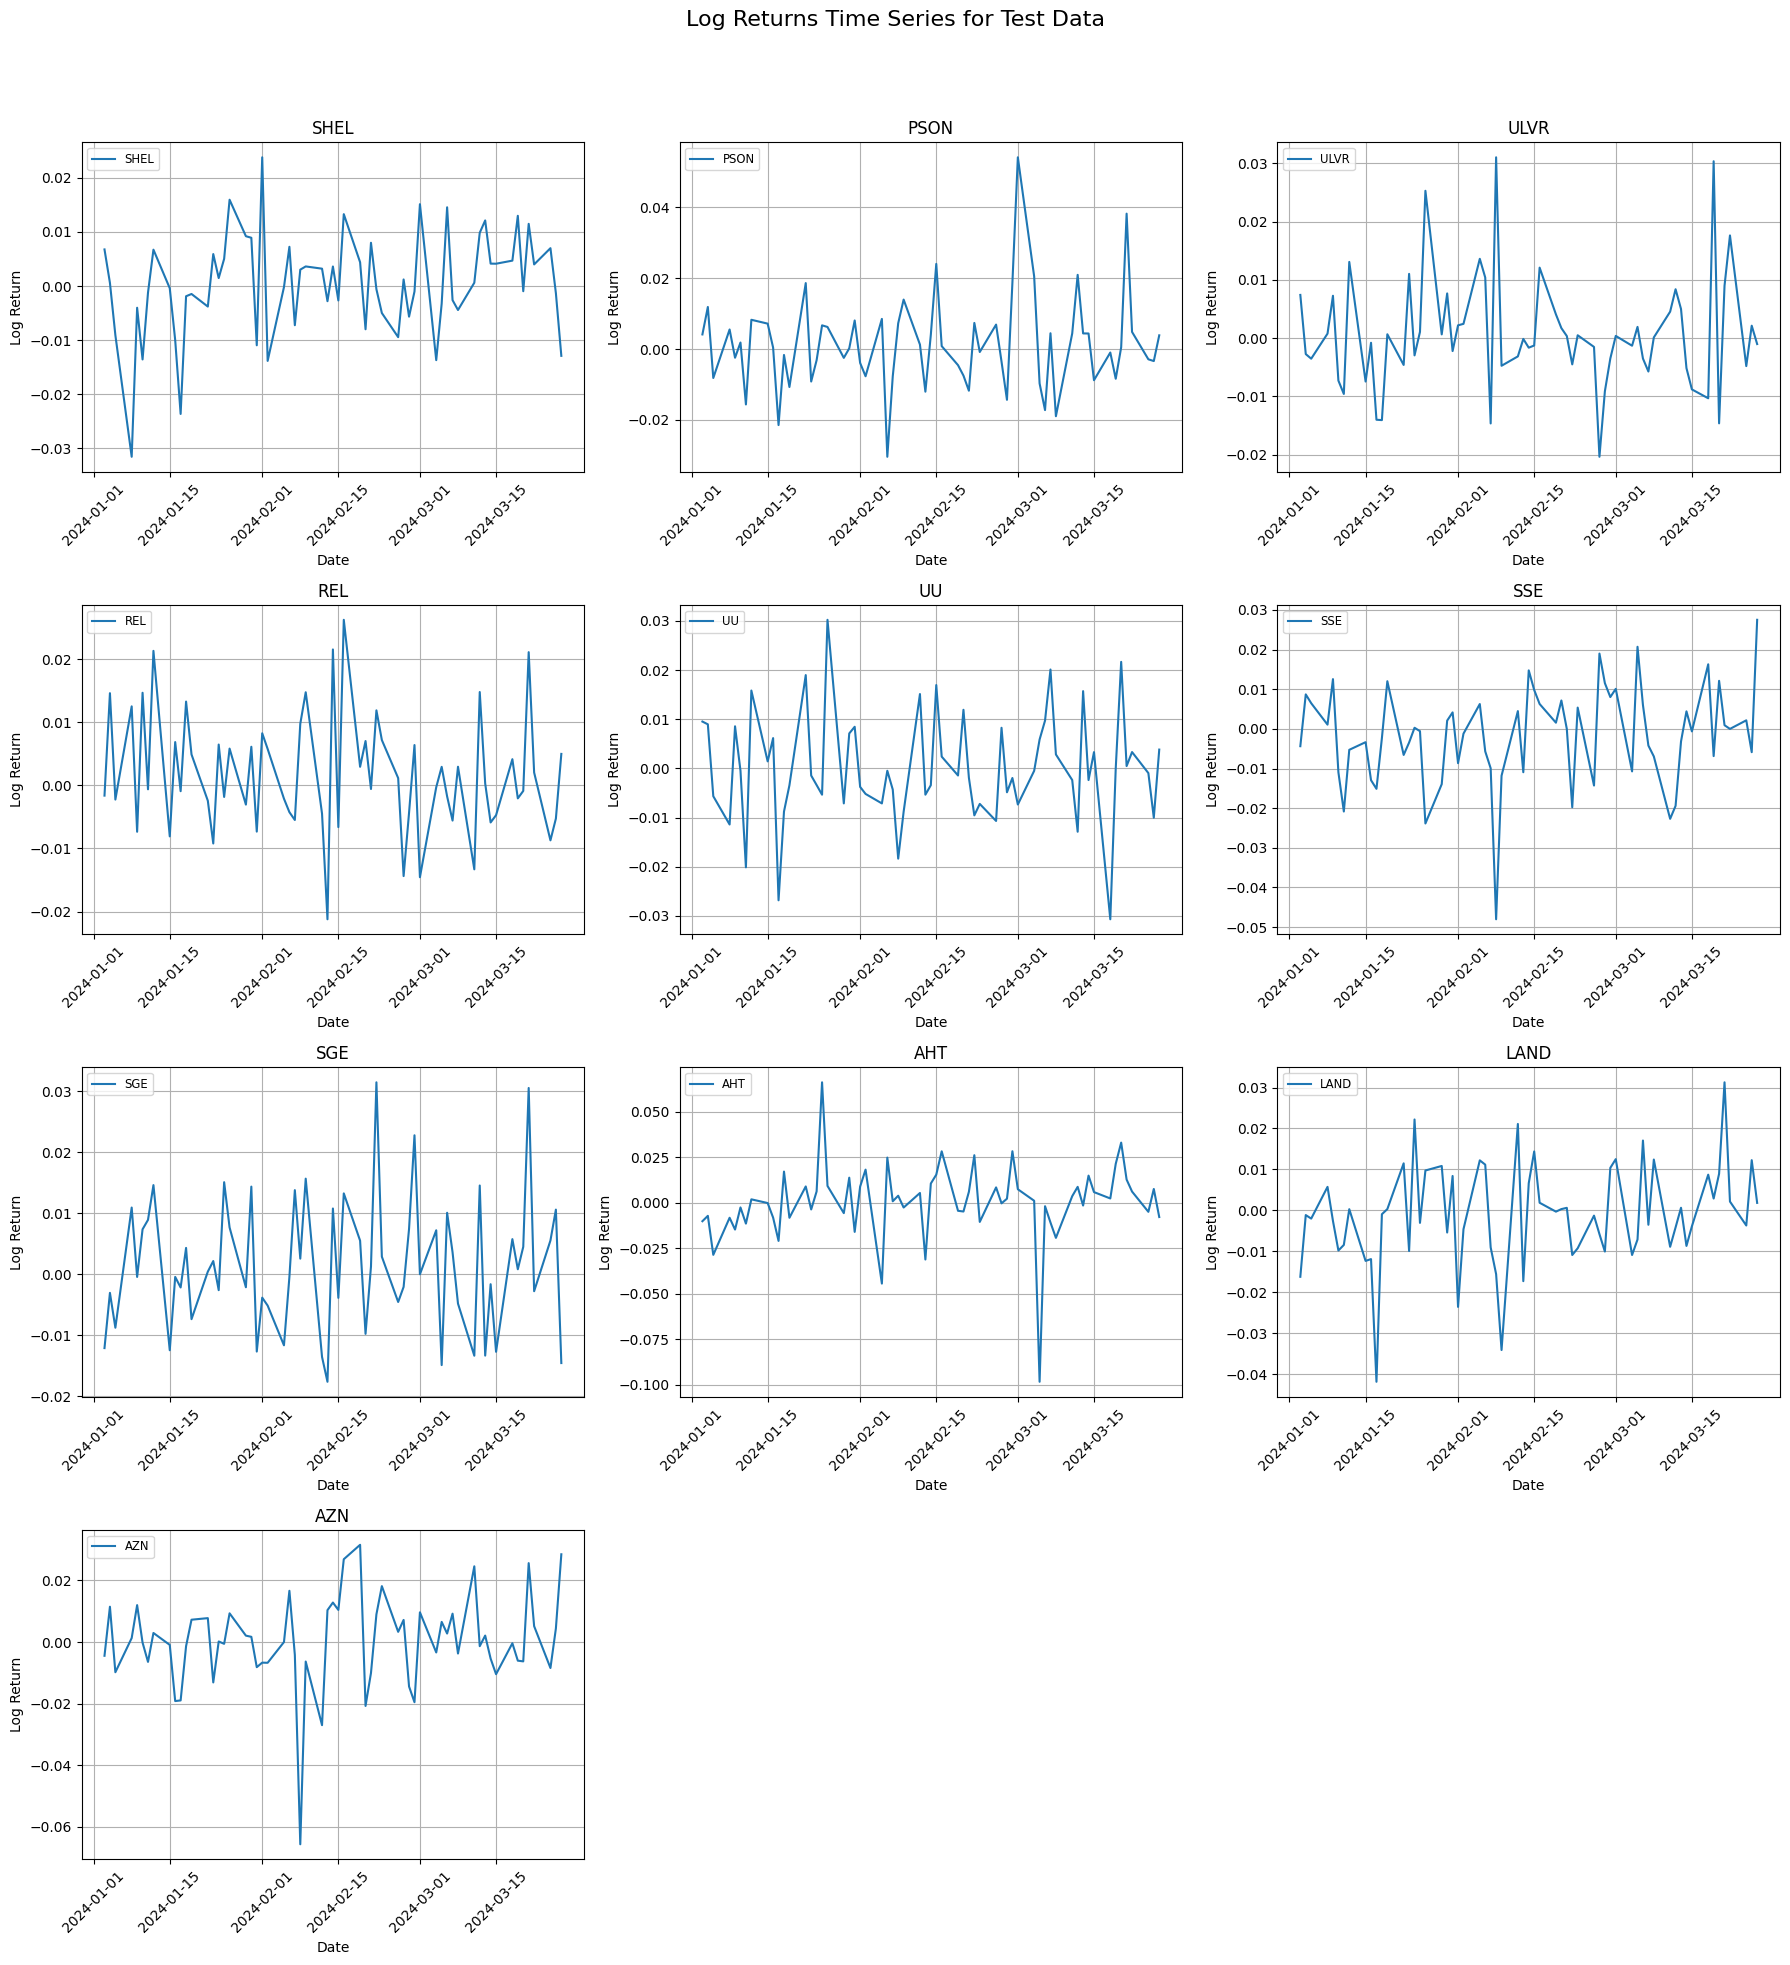

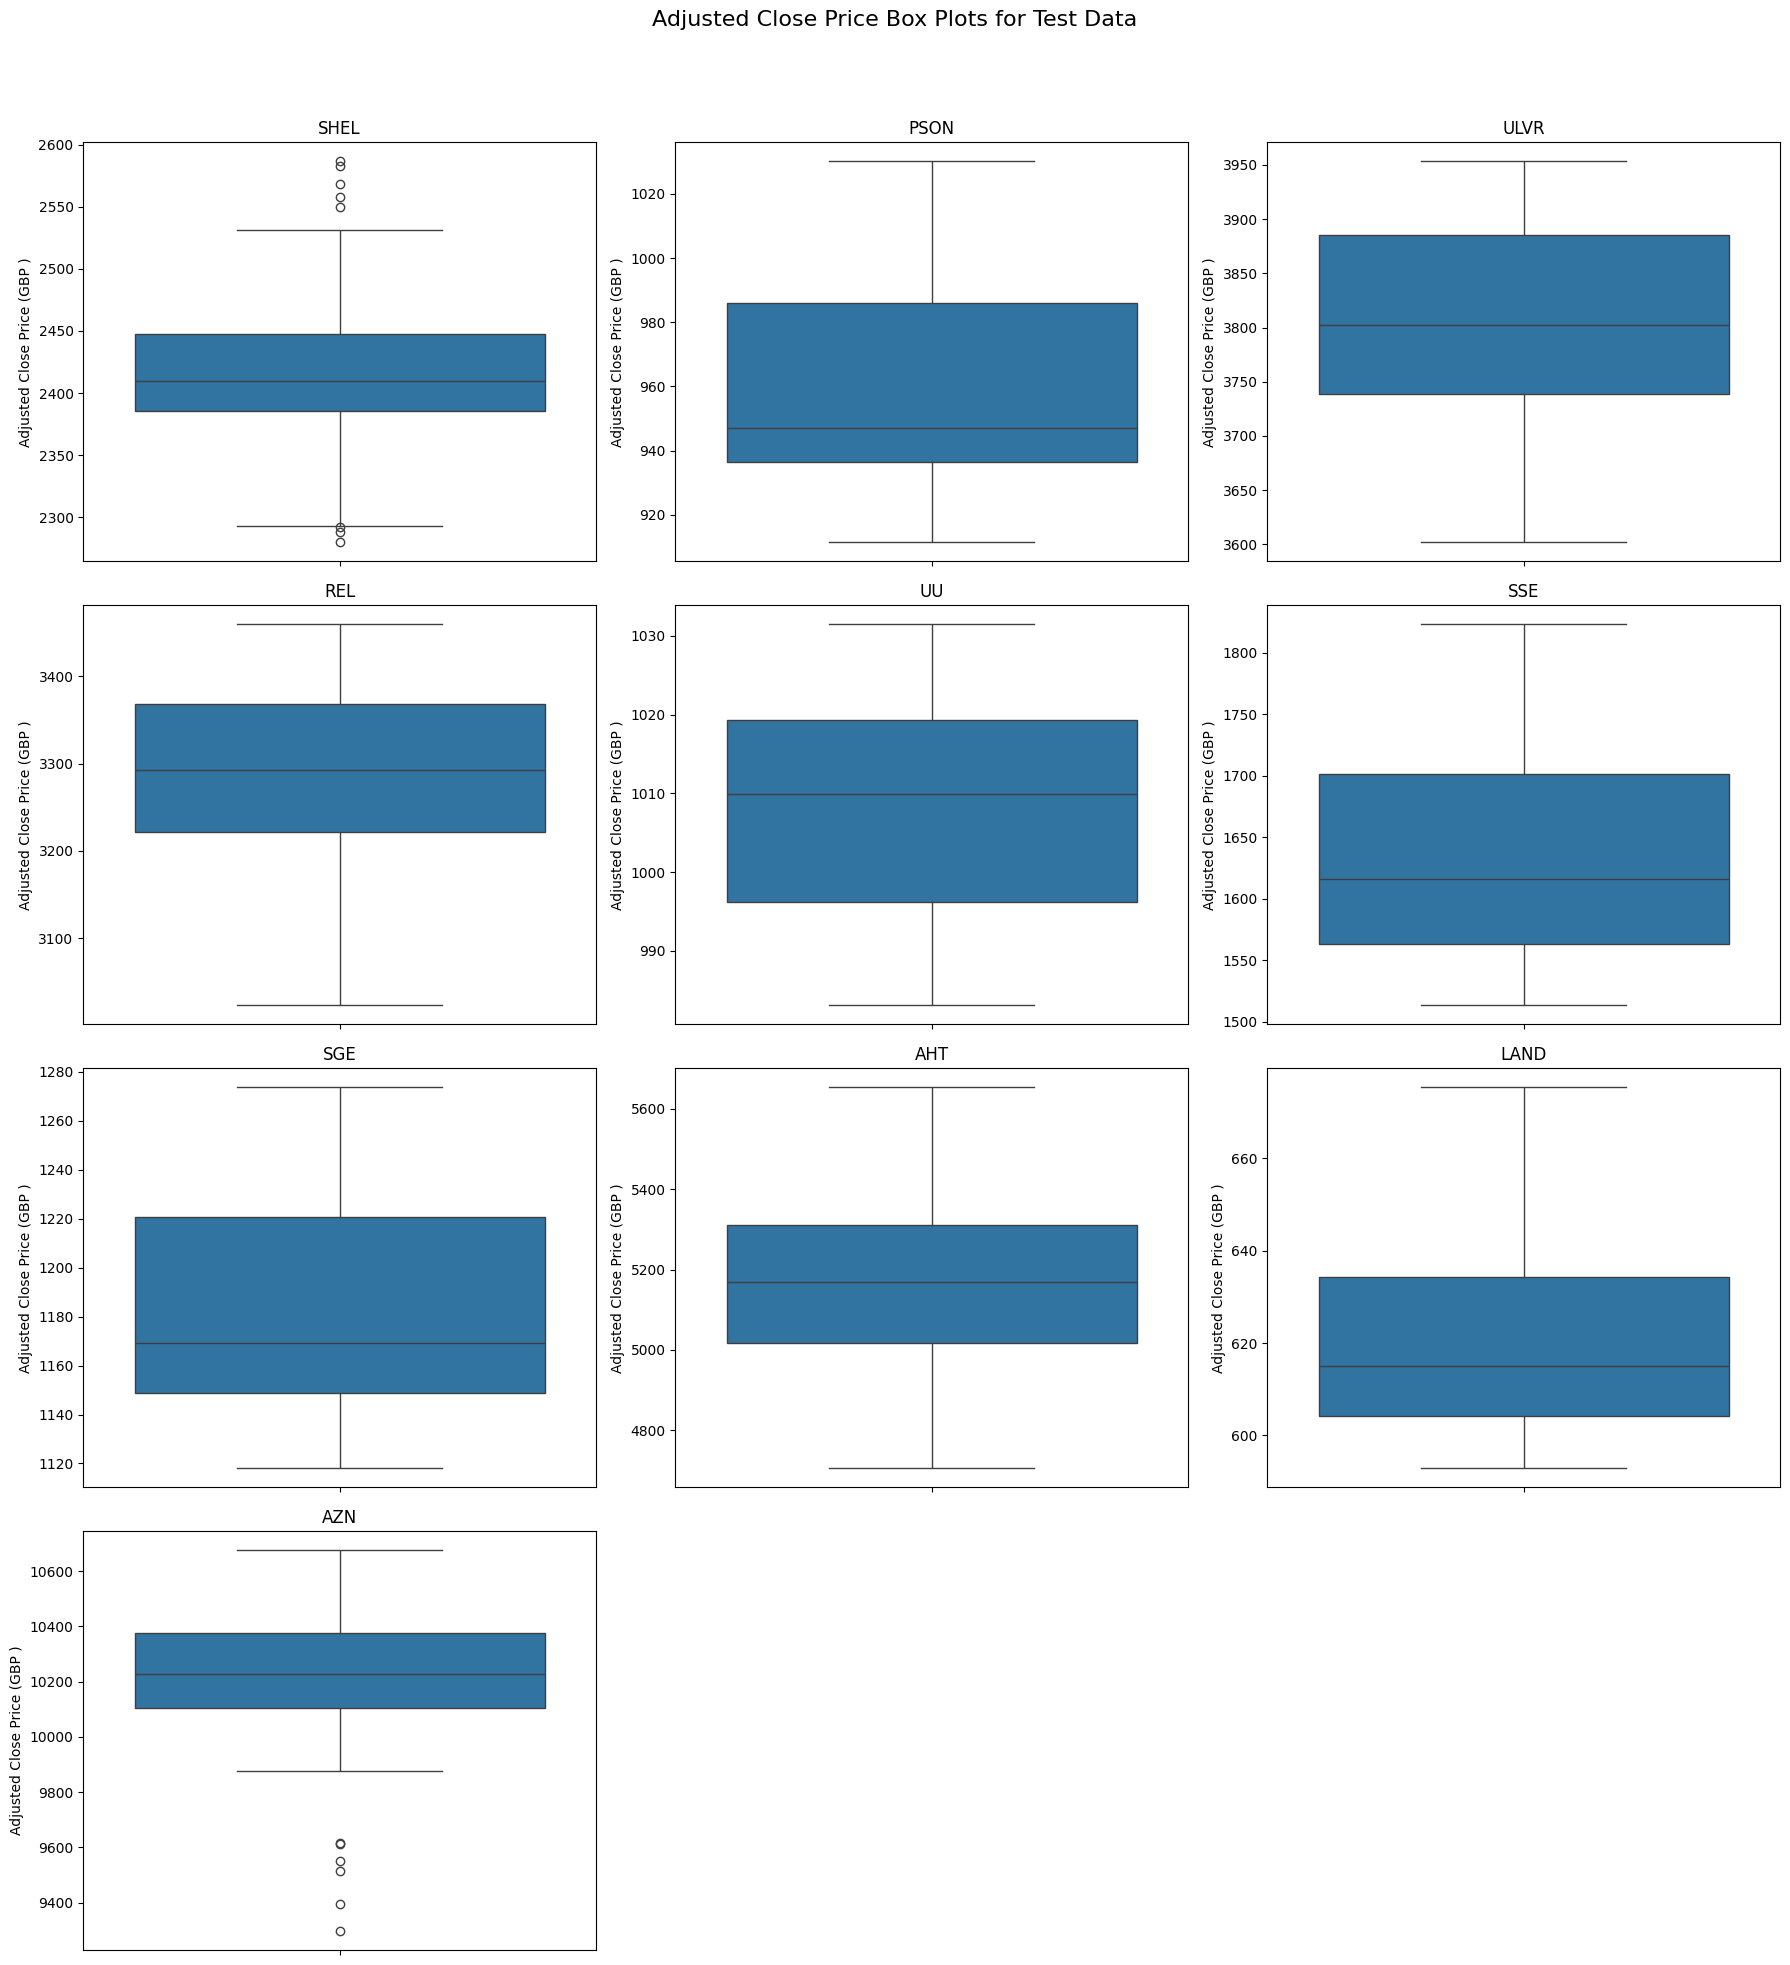

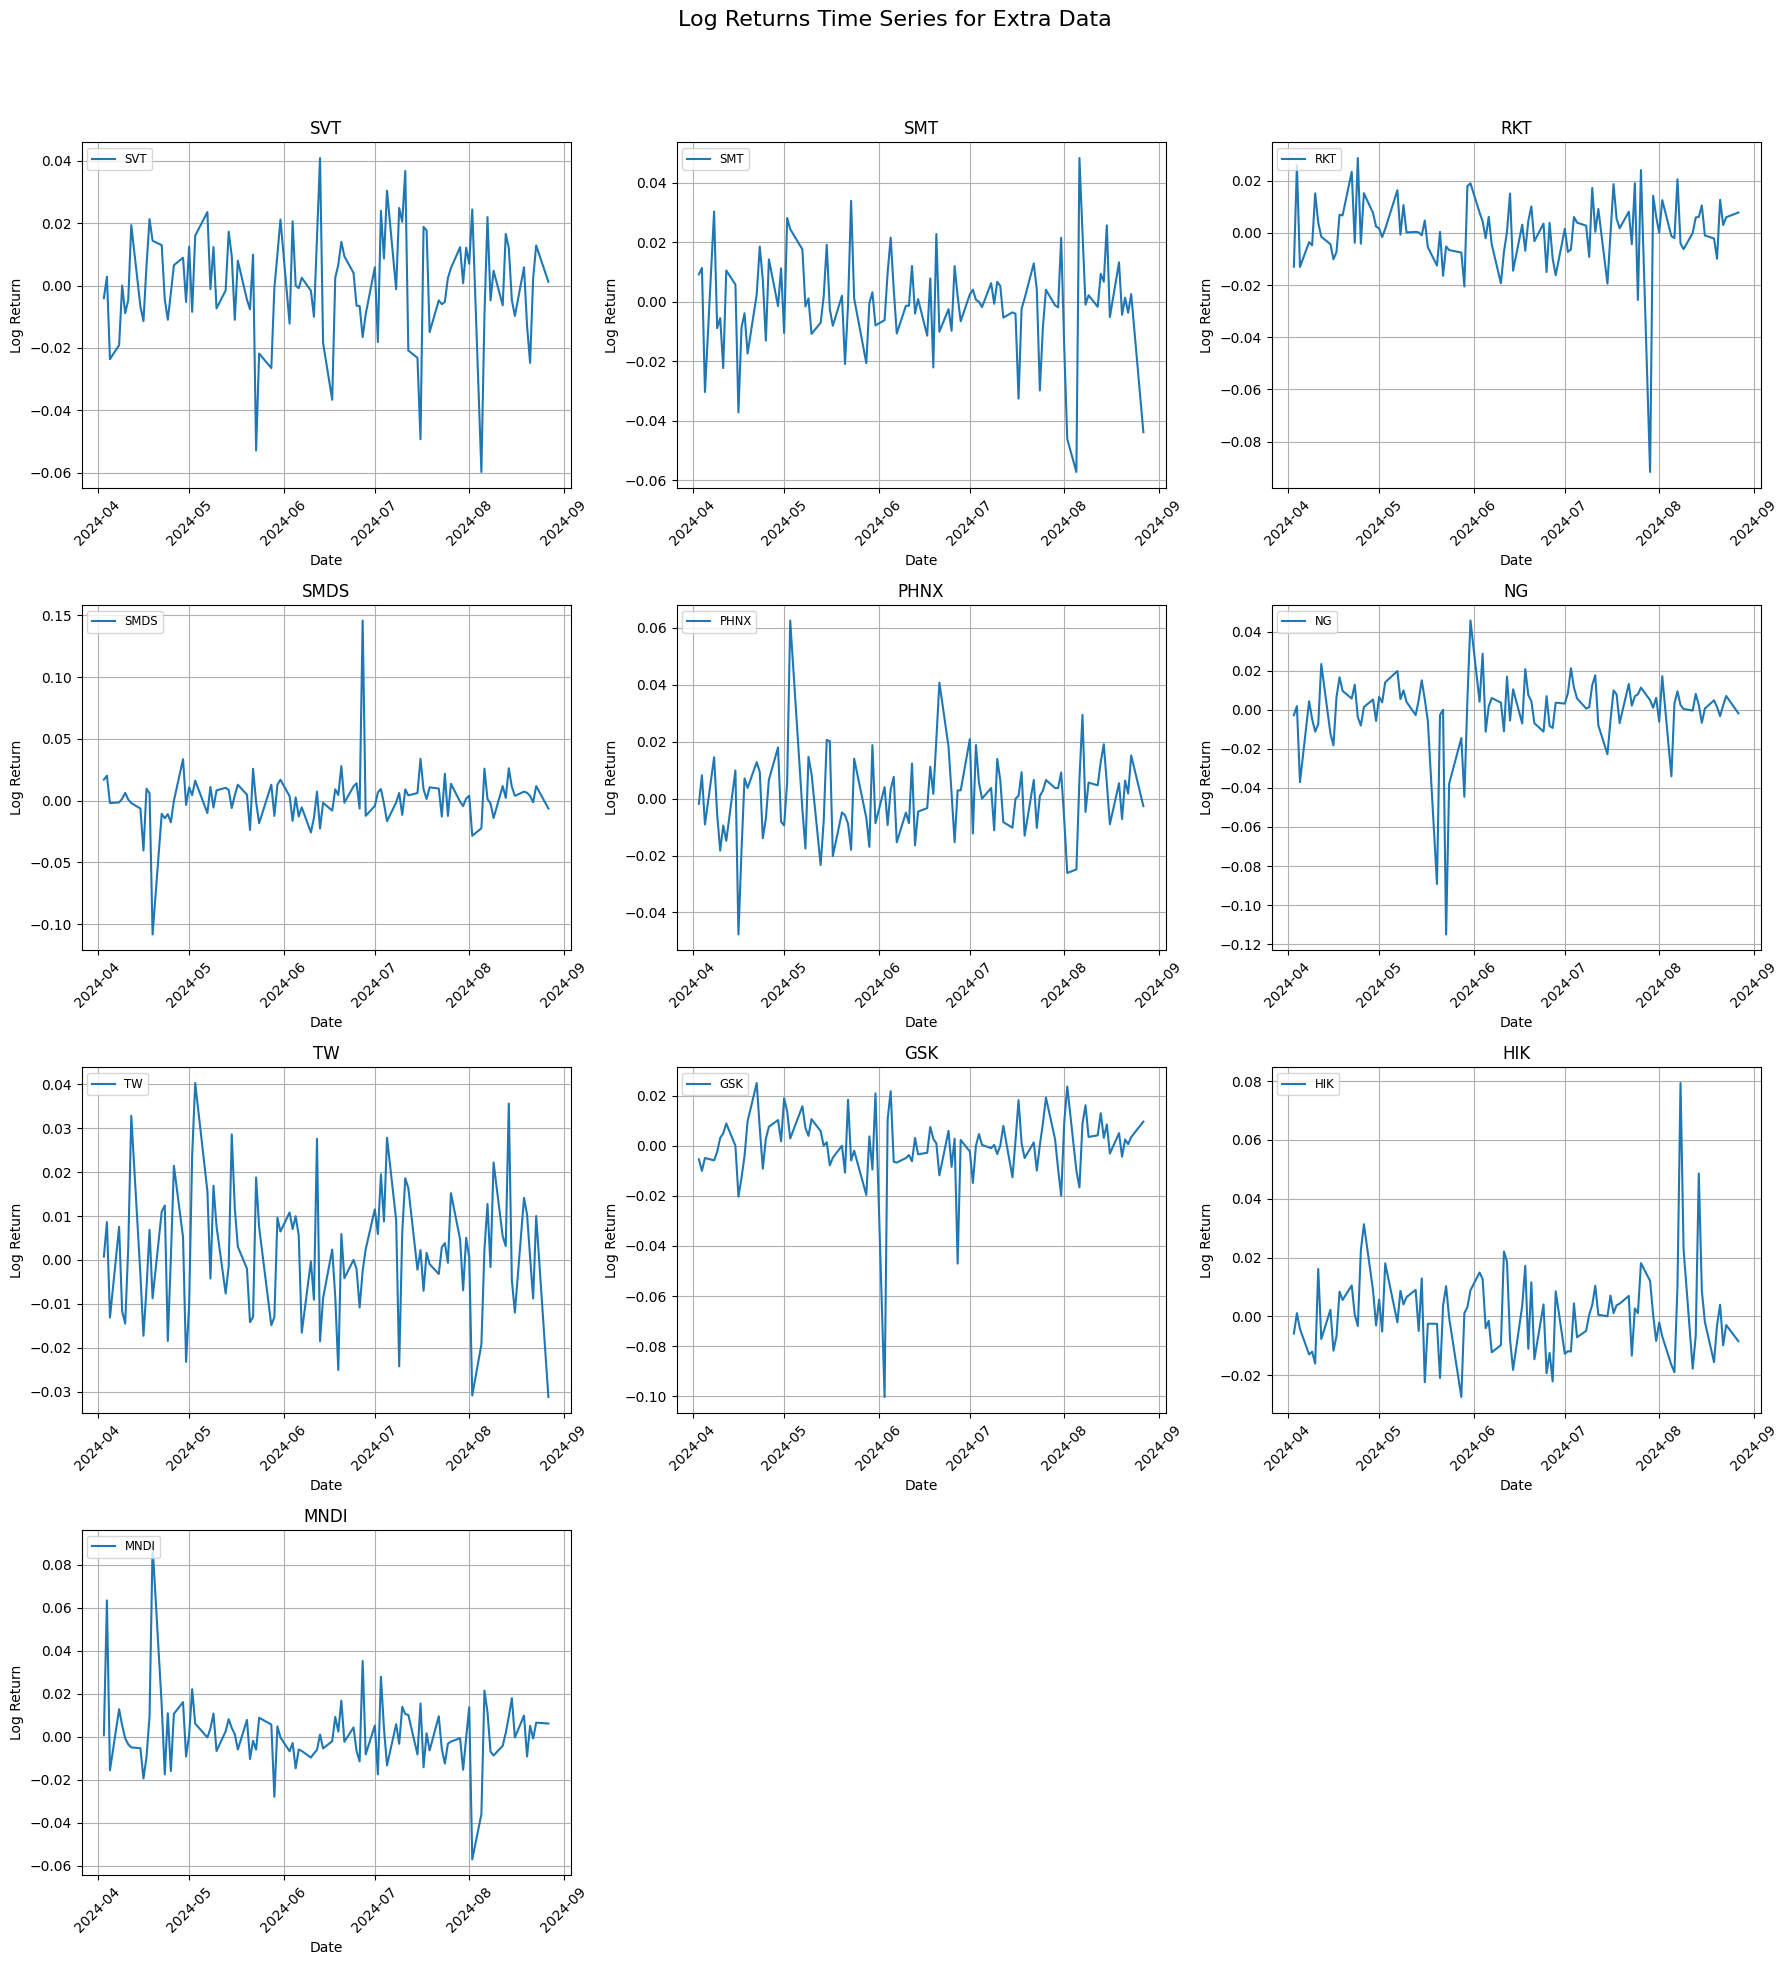

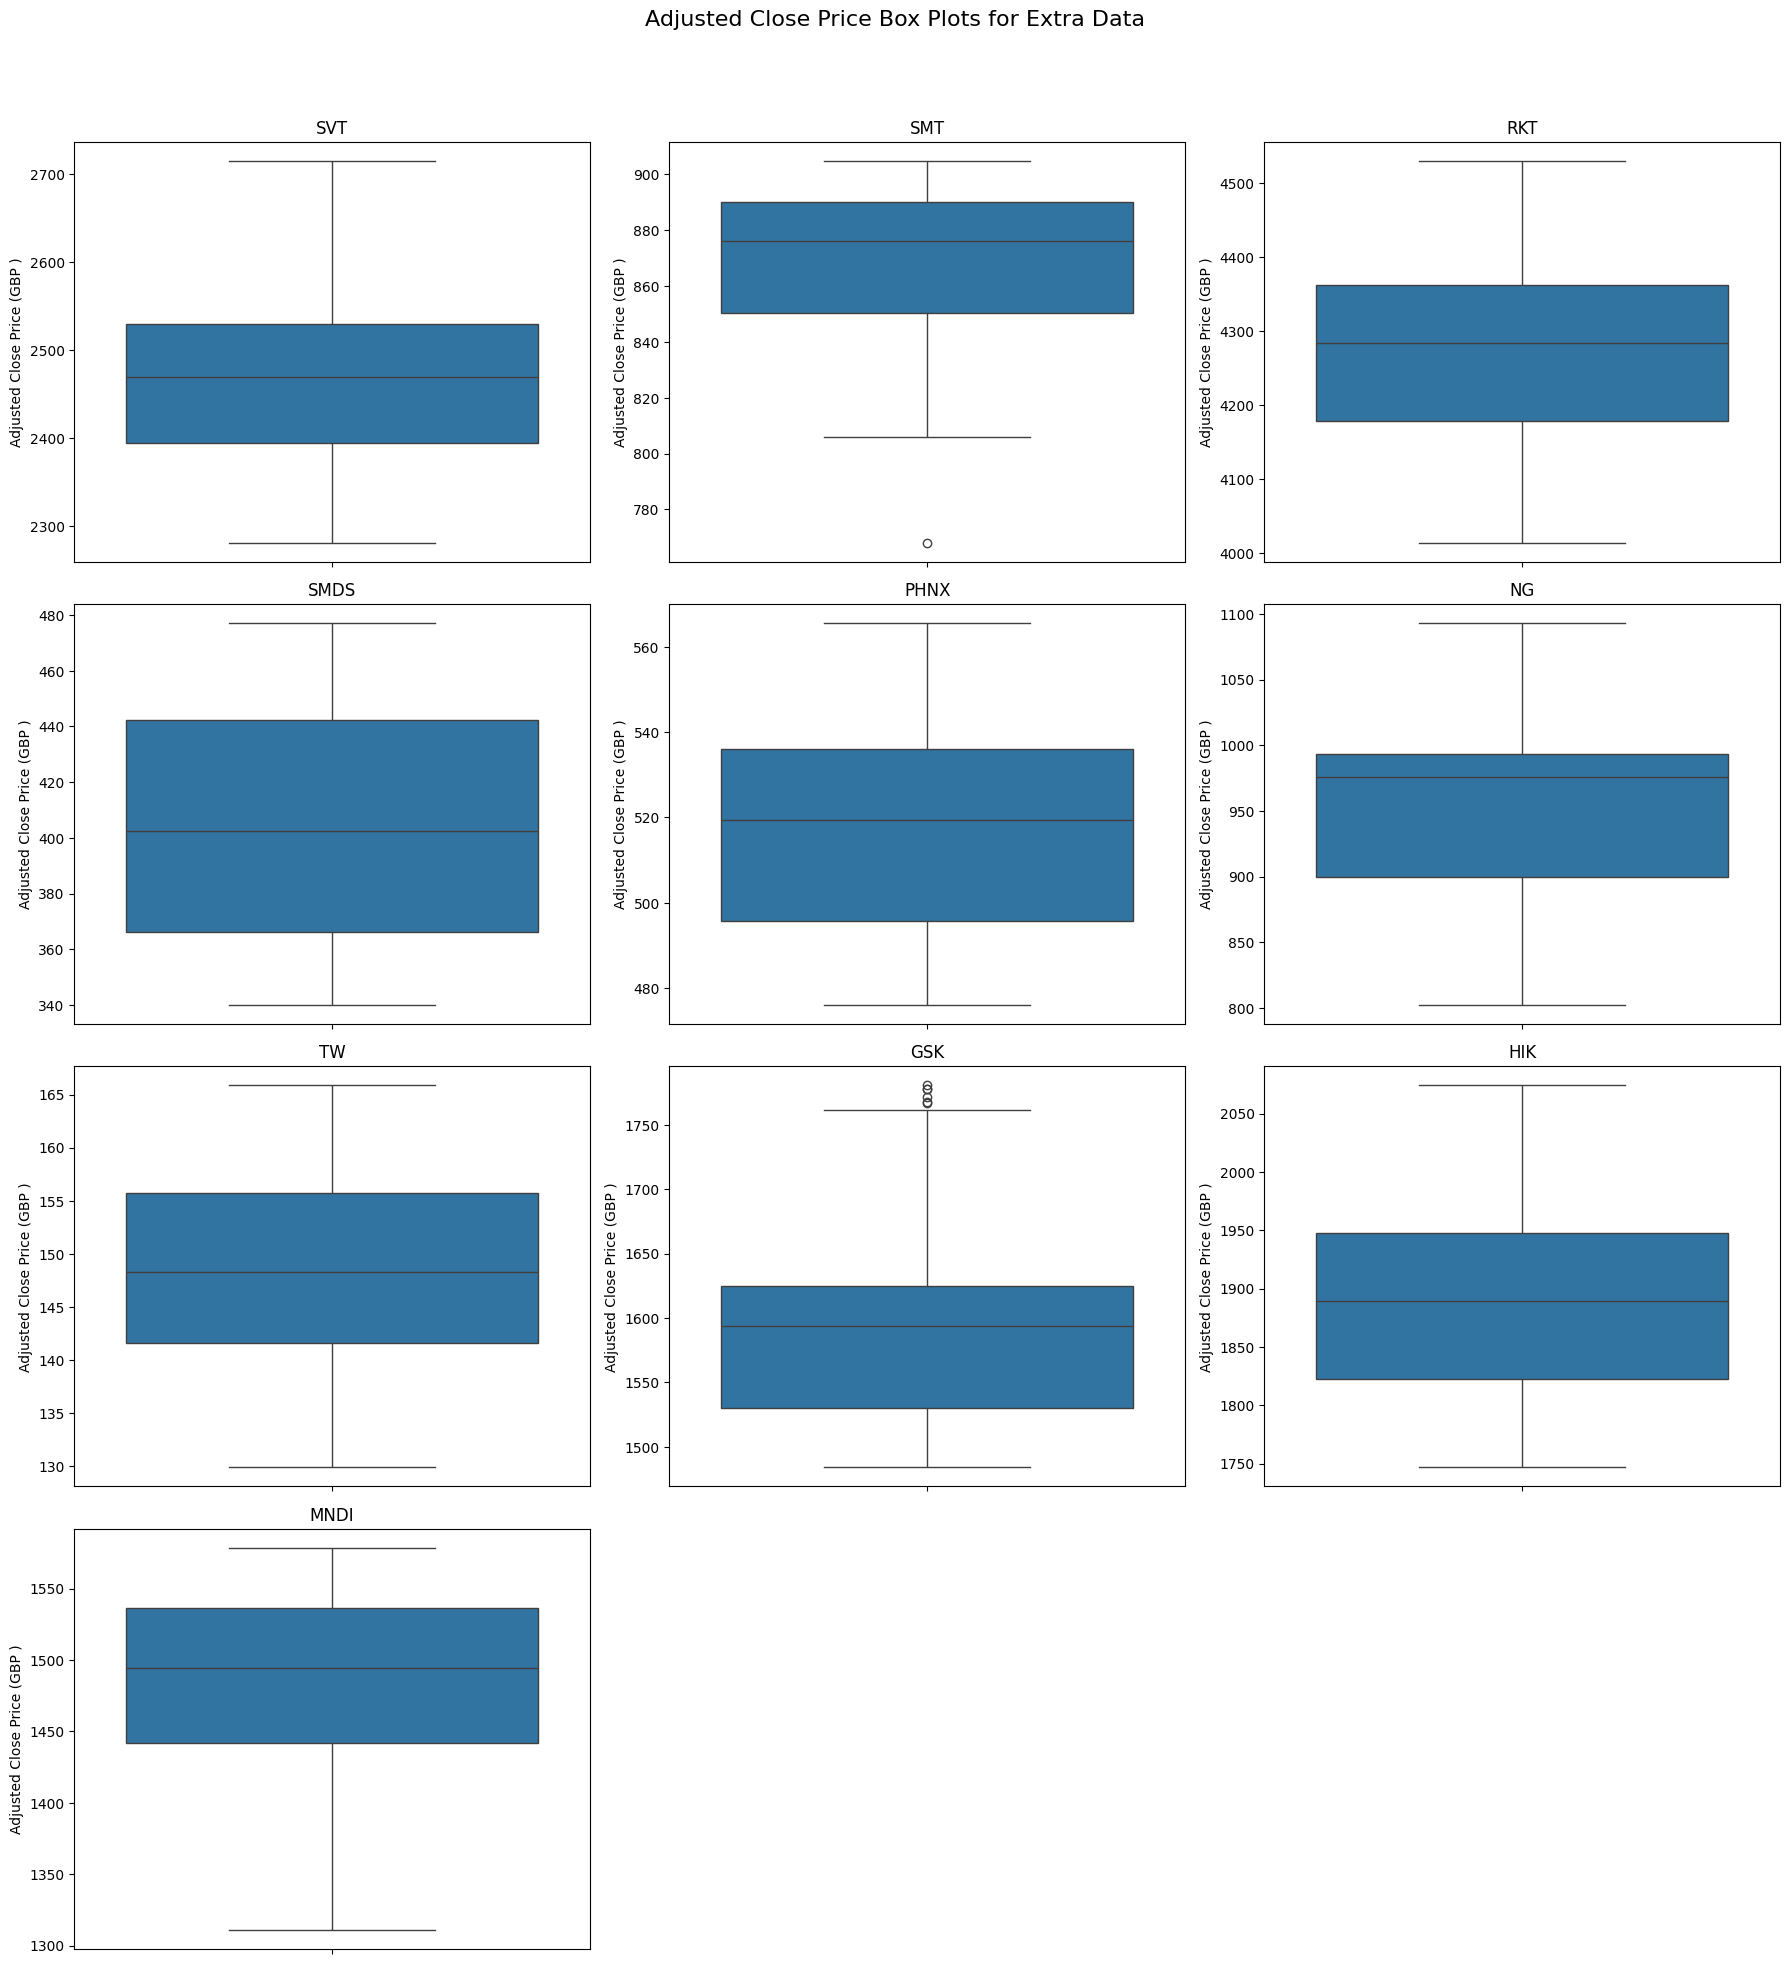

In [14]:
def calculate_log_returns(df):
    """
    Calculate the log returns for each ticker in the DataFrame.

    Args:
    - df (pd.DataFrame): DataFrame with 'Date' as the first column and
     adjusted close prices for each ticker.

    Returns:
    - pd.DataFrame: A new DataFrame containing log returns for each ticker,
    with the 'Date' column retained.
    """
    # Copy  original DataFrame
    log_returns = df.copy()

    # Loop through each column (excluding 'Date') to calculate log returns
    for column in df.columns[1:]:
        log_returns[column] = np.log(df[column] / df[column].shift(1))

    # Drop the first row
    log_returns = log_returns.dropna()

    # Return the DataFrame with calculated log returns
    return log_returns

def plot_log_returns(log_returns_data, title="Log Returns Time Series"):
    """
    Plot of log returns time series  in subplots with 3 plots per row.

    Args:
    - log_returns_data (pd.DataFrame): DataFrame containing log returns with
    'Date' as the first column.
    - title (str): The main title of the plot.

    Returns:
    - None. Displays the time series plots of log returns.
    """
    # Extract ticker symbols from the columns (excluding 'Date')
    tickers = log_returns_data.columns[1:]

    # Calculate the number of rows needed for subplots (3 plots per row)
    num_tickers = len(tickers)
    num_rows = (num_tickers + 2) // 3

    # Create a figure with subplots arranged in a grid
    fig, axs = plt.subplots(num_rows, 3, figsize=(18, num_rows * 5))

    # Set the main title for the entire figure
    fig.suptitle(title, fontsize=16)

    # Loop through each ticker to plot its log returns
    for i, ticker in enumerate(tickers):
        # Select the appropriate subplot
        ax = axs[i // 3, i % 3]

        # Plot the log returns against the Date
        ax.plot(log_returns_data['Date'], log_returns_data[ticker],
                label=ticker, linewidth=1.5)

        # Set the title, labels, and grid for each subplot
        ax.set_title(ticker, fontsize=12)
        ax.set_xlabel('Date')
        ax.set_ylabel('Log Return')
        ax.legend(loc='upper left', fontsize='small')
        ax.grid(True)

        # Rotate x-axis labels for better readability
        ax.tick_params(axis='x', rotation=45)

    # Remove any empty subplots
    for j in range(i + 1, num_rows * 3):
        fig.delaxes(axs.flatten()[j])

    # Adjust the layout to prevent overlapping
    plt.tight_layout(rect=[0, 0, 1, 0.95])

    # Display the plot
    plt.show()

# Function to plot box plots of adjusted close prices
def plot_box_plots(adj_close_data, title="Adjusted Close Price Box Plots",
                   currency="GBP", scale=""):
    """
    Create box plots for each ticker to detect outliers using the original
     adjusted close prices,
    with appropriate currency and scale.

    Args:
    - adj_close_data (pd.DataFrame): DataFrame containing adjusted close
     prices with 'Date' as the first column.
    - title (str): The main title of the plot.
    - currency (str): The currency unit of the adjusted close price ('GBP').
    - scale (str): The scale of the adjusted close price

    Returns:
    - None. Displays the box plots for adjusted close prices.
    """
    # Extract ticker symbols from the columns (excluding 'Date')
    tickers = adj_close_data.columns[1:]

    # Calculate the number of rows needed for subplots (3 plots per row)
    num_tickers = len(tickers)
    num_rows = (num_tickers + 2) // 3

    # Construct the y-axis label with currency and scale
    ylabel = f"Adjusted Close Price ({currency} {scale})".strip()

    # Create a figure with subplots arranged in a grid
    fig, axs = plt.subplots(num_rows, 3, figsize=(18, num_rows * 5))

    # Set the main title for the entire figure
    fig.suptitle(title, fontsize=16)

    # Loop through each ticker to create a box plot
    for i, ticker in enumerate(tickers):
        # Select the appropriate subplot
        ax = axs[i // 3, i % 3]

        # Create the box plot for the adjusted close prices
        sns.boxplot(y=adj_close_data[ticker], ax=ax)

        # Set the title and y-axis label for each subplot
        ax.set_title(ticker, fontsize=12)
        ax.set_ylabel(ylabel)

    # Remove any empty subplots
    for j in range(i + 1, num_rows * 3):
        fig.delaxes(axs.flatten()[j])

    # Adjust the layout to prevent overlapping
    plt.tight_layout(rect=[0, 0, 1, 0.95])

    # Display the plot
    plt.show()

# Calculate log returns for the training data
log_returns_train = calculate_log_returns(combined_train_data)

# Plot the log returns time series for the training data
plot_log_returns(
    log_returns_train, title="Log Returns Time Series for Training Data")

# Plot box plots for the adjusted close prices in the training data
plot_box_plots(
    combined_train_data, title= "Adjusted Close Price Box Plots for\n"
    f"Training Data",
               currency="GBP")

# Calculate log returns for the test data
log_returns_test = calculate_log_returns(combined_test_data)

# Plot the log returns time series for the test data
plot_log_returns(
    log_returns_test, title="Log Returns Time Series for Test Data")

# Plot box plots for the adjusted close prices in the test data
plot_box_plots(
    combined_test_data, title="Adjusted Close Price Box Plots for Test Data",
    currency="GBP")

# Calculate log returns for the extra data
log_returns_extra = calculate_log_returns(combined_extra_data)

# Plot the log returns time series for the extra data
plot_log_returns(
    log_returns_extra, title="Log Returns Time Series for Extra Data")

# Plot box plots for the adjusted close prices in the extra data
plot_box_plots(
    combined_extra_data, title="Adjusted Close Price Box Plots for Extra Data",
    currency="GBP")


### Setting Up for Consistency: Random Seeds

To ensure that my analysis is consistent and reproducible, I begin by setting a random seed. This step is crucial because it guarantees that any processes involving randomness—such as data splitting or model initialization—yield the same results every time I run the code. This consistency is vital for maintaining the integrity of my work.

#### Preprocessing the Data: An In-Depth Look

**Transforming Raw Data into a Usable Format**:
   - The `preprocess_data` function is central to my data preparation process. It takes the raw stock data and processes it into a format that is ready for machine learning models. Here’s how I approach this:

   **1. Ensuring the Output Directory Exists**:
      - First, I check whether the directory where I want to save the processed data exists. If it doesn’t, the function creates it. This step ensures that all my processed files are systematically saved and organized, making them easy to access later.

   **2. Organizing Data for Processing**:
      - I initialize a dictionary to store the processed data for the training, testing, and extra datasets. This structured approach allows me to manage and retrieve the data efficiently as I move through the preprocessing steps.

   **3. Iterating Through Each Dataset**:
      - The function processes each dataset—training, testing, and extra—individually. For each dataset, I follow these steps:

      **4. Indexing the Data by Date**:
         - If the 'Date' column isn’t already set as the index, I convert it to a datetime format and set it as the index. This ensures that my data remains properly ordered by time, which is essential for accurate time series analysis.

      **5. Calculating Technical Indicators**:
         - For each stock ticker, I calculate several technical indicators, including:
            - **Exponential Moving Average (EMA)**
            - **Relative Strength Index (RSI)**
            - **Moving Average Convergence Divergence (MACD)**
         - These indicators are widely used in financial analysis to capture trends and momentum in stock prices, enriching the dataset with valuable features for my machine learning models.

      **6. Generating Lagged Features**:
         - I create lagged features by shifting the stock prices by a specified number of periods. This step is crucial as it allows the model to incorporate information from previous time periods, capturing the temporal dependencies that are key for time series forecasting.

      **7. Scaling the Features and Target**:
         - To ensure that all features contribute equally to the model, I scale the data. I use `RobustScaler` for the features and `StandardScaler` for the target variable. This scaling process is important because it prevents any single feature from disproportionately influencing the model due to differences in units or range.

      **8. Saving the Processed Data**:
         - Finally, I save the processed data along with the scalers used for scaling. This not only preserves the datasets but also ensures that I can consistently apply the same scaling during model training and testing, maintaining the reproducibility of my analysis.

**Verifying the Preprocessed Data**:
   - After completing the preprocessing steps, I print the shapes of the processed datasets. This serves as a final check to confirm that the preprocessing has been applied correctly and that the data is in the expected format, ready for further analysis.

### Conclusion

The `preprocess_data` function is essential in transforming raw stock data into a structured format that’s ready for machine learning. By calculating technical indicators, generating lagged features, and scaling the data, I ensure that the datasets are well-prepared for accurate and reliable modeling. Additionally, by saving the processed data and scalers, I guarantee that the preprocessing steps are reproducible, which is a critical aspect of any robust analytical workflow.


In [ ]:
# Set random seeds for reproducibility
set_random_seeds()

def preprocess_data(train_data, test_data, extra_data, n_lags=5,
                    output_dir='processed_data'):
    """
    Preprocess stock data, create lagged features, and save processed data.
    """
    # Ensure output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Initialize dictionary for data
    preprocessed_data = {'train': {}, 'test': {}, 'extra': {}}

    # Datasets to iterate through
    datasets = {'train': train_data, 'test': test_data,  'extra': extra_data}

    for name, data in datasets.items():
        print(f"Processing {name} data")

        if data.index.name != 'Date':
            print(f"Indexing {name} by 'Date'")
            data['Date'] = pd.to_datetime(data['Date'])
            data.set_index('Date', inplace=True)

        for ticker in data.columns:
            print(f"Processing {ticker}")
            stock_data = data[[ticker]].copy()

            # Compute technical indicators
            stock_data['EMA_20'] = ta.trend.ema_indicator(
                stock_data[ticker], window=20)
            stock_data['RSI'] = ta.momentum.rsi(
                stock_data[ticker], window=14)
            stock_data['MACD'] = ta.trend.macd(
                stock_data[ticker])

            # Create lagged features
            for lag in range(1, n_lags + 1):
                stock_data[f'{ticker}_lag_{lag}'] = \
                    stock_data[ticker].shift(lag)

            stock_data.dropna(inplace=True)

            if stock_data.empty:
                print(f"No data left for {ticker}")
                continue

            # Separate features and target
            X = stock_data.drop(columns=[ticker])
            y = stock_data[ticker]

            # Scale features and target
            feature_scaler = RobustScaler()
            X_scaled = feature_scaler.fit_transform(X)
            y_scaled = target_scaler.fit_transform(
                y.values.reshape(-1, 1)).flatten()

            X_scaled = pd.DataFrame(X_scaled, columns=X.columns,
                                    index=X.index)
            y_scaled = pd.Series(y_scaled, index=y.index)

            # Store scaled data
            preprocessed_data[name][ticker] = {
                'X': X_scaled,
                'y': y_scaled,
                'feature_scaler': feature_scaler,
                'target_scaler': target_scaler
            }

            # Save processed data
            X_scaled.to_csv(os.path.join(output_dir,
                              f'{name}_{ticker}_X.csv'))
            y_scaled.to_csv(os.path.join(output_dir,
                              f'{name}_{ticker}_y.csv'))
            joblib.dump(feature_scaler, os.path.join(output_dir,
                        f'{name}_{ticker}_feature_scaler.pkl'))
            joblib.dump(target_scaler, os.path.join(output_dir,
                        f'{name}_{ticker}_target_scaler.pkl'))

    # Print data shapes
    print("\nFinal shapes of preprocessed data:")
    for name, dataset in preprocessed_data.items():
        print(f"\n{name.capitalize()} data:")
        for ticker, data in dataset.items():
            print(f"  {ticker}: X shape {data['X'].shape}, "
                  f"y shape {data['y'].shape}")

    return preprocessed_data


# Preprocess the datasets
preprocessed_data = preprocess_data(combined_train_data, combined_test_data,
                                    combined_extra_data)



### Combining Historical Training Datasets for Enhanced Machine Learning

#### Ensuring Reproducibility with Random Seeds

To maintain consistency and reproducibility in the results, a random seed is set at the beginning. This step is essential in any analytical process involving randomness, ensuring that outcomes remain consistent across different runs.

#### Combining Historical Training Datasets

**Objective**:
   - The goal here is to combine historical training datasets into a single, cohesive dataset. This unified dataset will be used to train machine learning models, allowing them to learn from a comprehensive set of features and target values across all tickers.

**Process**:
   - The `combine_hist_train_datasets` function is used to merge the preprocessed data. This function consolidates input features (`combined_X`) and target values (`combined_y`) from all tickers within the training set.

   **1. Initializing Storage for Combined Data**:
      - Two lists, `combined_X` for input features and `combined_y` for target values, are initialized to store data from each ticker in the training set.

   **2. Aggregating Data Across Tickers**:
      - The function iterates through the training data for each ticker, appending the corresponding feature data (`X`) and target data (`y`) to the initialized lists. This step gathers all relevant data into a single location, ready for combination.

   **3. Combining the Data**:
      - After collecting the data, the features from all tickers are vertically stacked using `np.vstack`, creating a single, continuous array. Similarly, the target values are concatenated into one array using `np.concatenate`, resulting in a unified dataset.

**Output**:
   - The shapes of `combined_X` and `combined_y` are printed to verify the success of the merging process. These shapes provide an overview of the dimensions of the combined dataset, ensuring that the data is properly structured for the next steps in the modeling process.

### Conclusion

Combining historical training datasets into a single set of features and target values is a crucial step. It ensures that machine learning models have access to a comprehensive and unified dataset, which is essential for developing robust and generalizable predictions.


In [61]:
# Set random seeds for reproducibility
set_random_seeds()

def combine_hist_train_datasets(preprocessed_data):
    """
    Combine historical training datasets.

    Args:
    - preprocessed_data: Dict with preprocessed data.

    Returns:
    - combined_X: Combined input features.
    - combined_y: Combined target values.

    This function combines the features (X) and target
    values (y) from all tickers in the training data.
    """
    combined_X = []  # List to hold combined features
    combined_y = []  # List to hold combined targets

    # Loop through each ticker's training data
    for ticker, data in preprocessed_data['train'].items():
        combined_X.append(data['X'].values)  # Append feature data
        combined_y.append(data['y'].values)  # Append target data

    # Vertically stack features from all tickers
    combined_X = np.vstack(combined_X)
    # Concatenate target values into one array
    combined_y = np.concatenate(combined_y)

    return combined_X, combined_y


# Call the function with the example data
combined_X, combined_y = combine_hist_train_datasets(preprocessed_data)

# Output the shapes of the combined data
print(f"Combined X shape: {combined_X.shape}")
print(f"Combined y shape: {combined_y.shape}")

Combined X shape: (24960, 8)
Combined y shape: (24960,)


# Building and Training an LSTM Model for Time Series Forecasting

## Setting the Seed for Reproducibility

To ensure consistency and reproducibility in the results, a random seed is set at the beginning. This practice is essential in machine learning tasks, particularly when randomness is involved in data processing or model training.

## Reshaping Data for LSTM

**Function**: `reshape_for_lstm`

- **Purpose**:
  - This function reshapes the input data to be compatible with an LSTM model, which requires a 3D input format: `[samples, time steps, features]`.
  
- **Process**:
  - The function creates sequences of data using a rolling window approach, where each sequence consists of a defined number of time steps (`sequence_length`). This rolling window ensures that the LSTM model can learn patterns across multiple time steps.

- **Return Value**:
  - The reshaped data is returned as a NumPy array, ready for input into the LSTM model.

## Custom RMSE Metric

**Function**: `rmse`

- **Purpose**:
  - The custom RMSE (Root Mean Square Error) function is defined to measure the model’s performance. RMSE is particularly useful in regression tasks as it provides a direct measure of the difference between the predicted and actual values.

## Building the LSTM Model

**Function**: `build_lstm_model`

- **Purpose**:
  - This function constructs and compiles an LSTM model with added features such as dropout, regularization, and an attention mechanism to enhance performance.

- **Model Architecture**:
  - **Input Layer**: Receives the reshaped data.
  - **Bidirectional LSTM Layer**: Captures dependencies in both forward and backward directions, with regularization to prevent overfitting.
  - **Dropout Layer**: Applied to reduce overfitting by randomly setting a fraction of input units to zero during training.
  - **Attention Mechanism**: Focuses on key features within the sequence to improve the model’s focus on important data points.
  - **Concatenation and Flattening**: Combines and flattens the LSTM and attention outputs.
  - **Dense Layer**: Includes ReLU activation and additional regularization.
  - **Output Layer**: Provides the final regression output.

- **Compilation**:
  - The model is compiled with the Adam optimizer, using Mean Squared Error (MSE) as the loss function and both MAE (Mean Absolute Error) and RMSE as evaluation metrics.

## Preparing Data for Training

**Reshaping Data**:
  - The combined training data is reshaped using the `reshape_for_lstm` function with a defined sequence length of 30.

**Data Splitting**:
  - The reshaped data is split into training and validation sets based on a split ratio of 80% training and 20% validation. This split ensures that the model is trained on one portion of the data while being validated on another.

## Training the Model

- **Model Training**:
  - The LSTM model is trained using the training data, with validation on the separate validation set. Early stopping is implemented to prevent overfitting by monitoring the validation loss and halting training if there is no improvement for five consecutive epochs.

- **Saving the Model**:
  - After training, the model is saved in the `.keras` format, preserving the trained model for future use.

## Visualizing Training Performance

**Plotting Loss and MAE**:
  - The training and validation loss are plotted to visualize how the model's performance evolves over the training epochs. Similarly, the Mean Absolute Error (MAE) is plotted for both training and validation sets to provide further insights into the model's accuracy.

**Displaying Model Summary**:
  - A summary of the model architecture is displayed, offering an overview of the model layers, parameters, and structure.

**Visualizing the Model Architecture**:
  - The architecture of the LSTM model is visualized and saved as an image. This visual representation helps in understanding the model’s complexity and structure.

## Conclusion

The LSTM model is successfully built, trained, and evaluated on the provided data. By incorporating advanced features like bidirectional LSTM, dropout, and attention mechanisms, the model is designed to handle time series forecasting effectively. The training process is carefully monitored to prevent overfitting, ensuring that the model generalizes well to unseen data.


X_train shape: (24931, 30, 8)
y_train shape: (24931,)
Epoch 1/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.7852 - mae: 0.4197 - rmse: 1.3627 - val_loss: 0.4782 - val_mae: 0.2122 - val_rmse: 0.3080
Epoch 2/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.5846 - mae: 0.3258 - rmse: 1.3537 - val_loss: 0.4315 - val_mae: 0.2394 - val_rmse: 0.3358
Epoch 3/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.5085 - mae: 0.3093 - rmse: 1.3490 - val_loss: 0.3734 - val_mae: 0.2371 - val_rmse: 0.3375
Epoch 4/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.4422 - mae: 0.2948 - rmse: 1.3527 - val_loss: 0.3064 - val_mae: 0.2038 - val_rmse: 0.3079
Epoch 5/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.3889 - mae: 0.2846 - rmse: 1.3532 - val_loss: 0.2844 - val_mae: 0.2335 - val_rmse: 0.3304
Epoch 6/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.3483 - mae: 0.2813 - rmse: 1.3517 - val_loss: 0.2359 - val_mae: 0.2076 - val_rmse: 0.3119
Epoch 7/50
399/399 ━━━━━━━━━━━

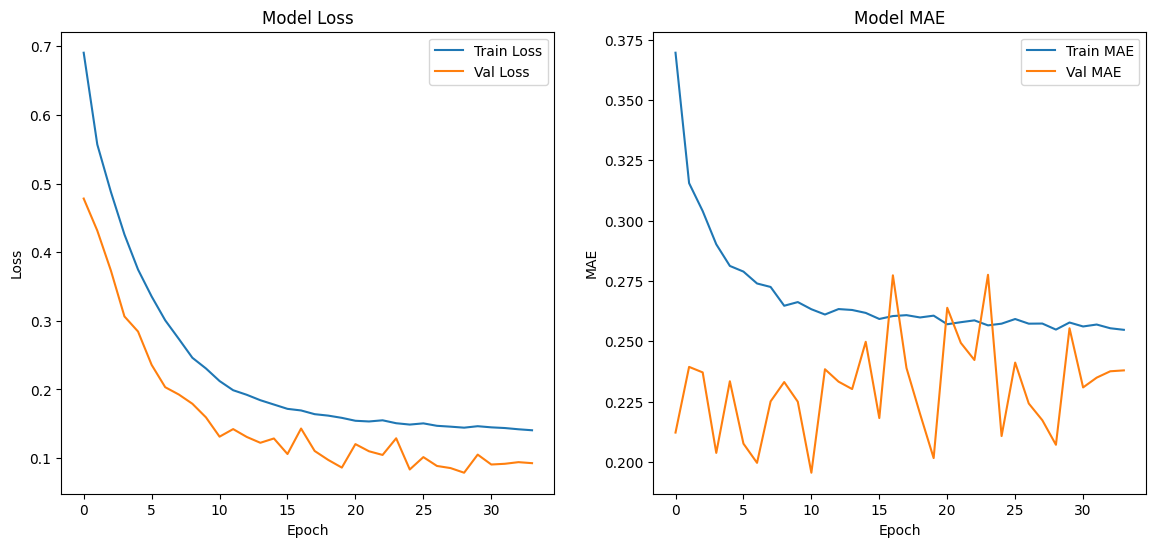

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 30, 8)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_1           │ (None, 30, 100)        │         23,600 │ input_layer_1[0][0]    │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 30, 100)        │              0 │ bidirectional_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_1 (Attention)   │ (None, 30, 100)        │              0 │ dropout_2[0][0],       │
│                           │                        │                │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 30, 200)        │              0 │ dropout_2[0][0],       │
│ (Concatenate)             │                        │                │ attention_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 6000)           │              0 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 32)             │        192,032 │ flatten_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 32)             │              0 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 1)              │             33 │ dropout_3[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 646,997 (2.47 MB)

 Trainable params: 215,665 (842.44 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 431,332 (1.65 MB)

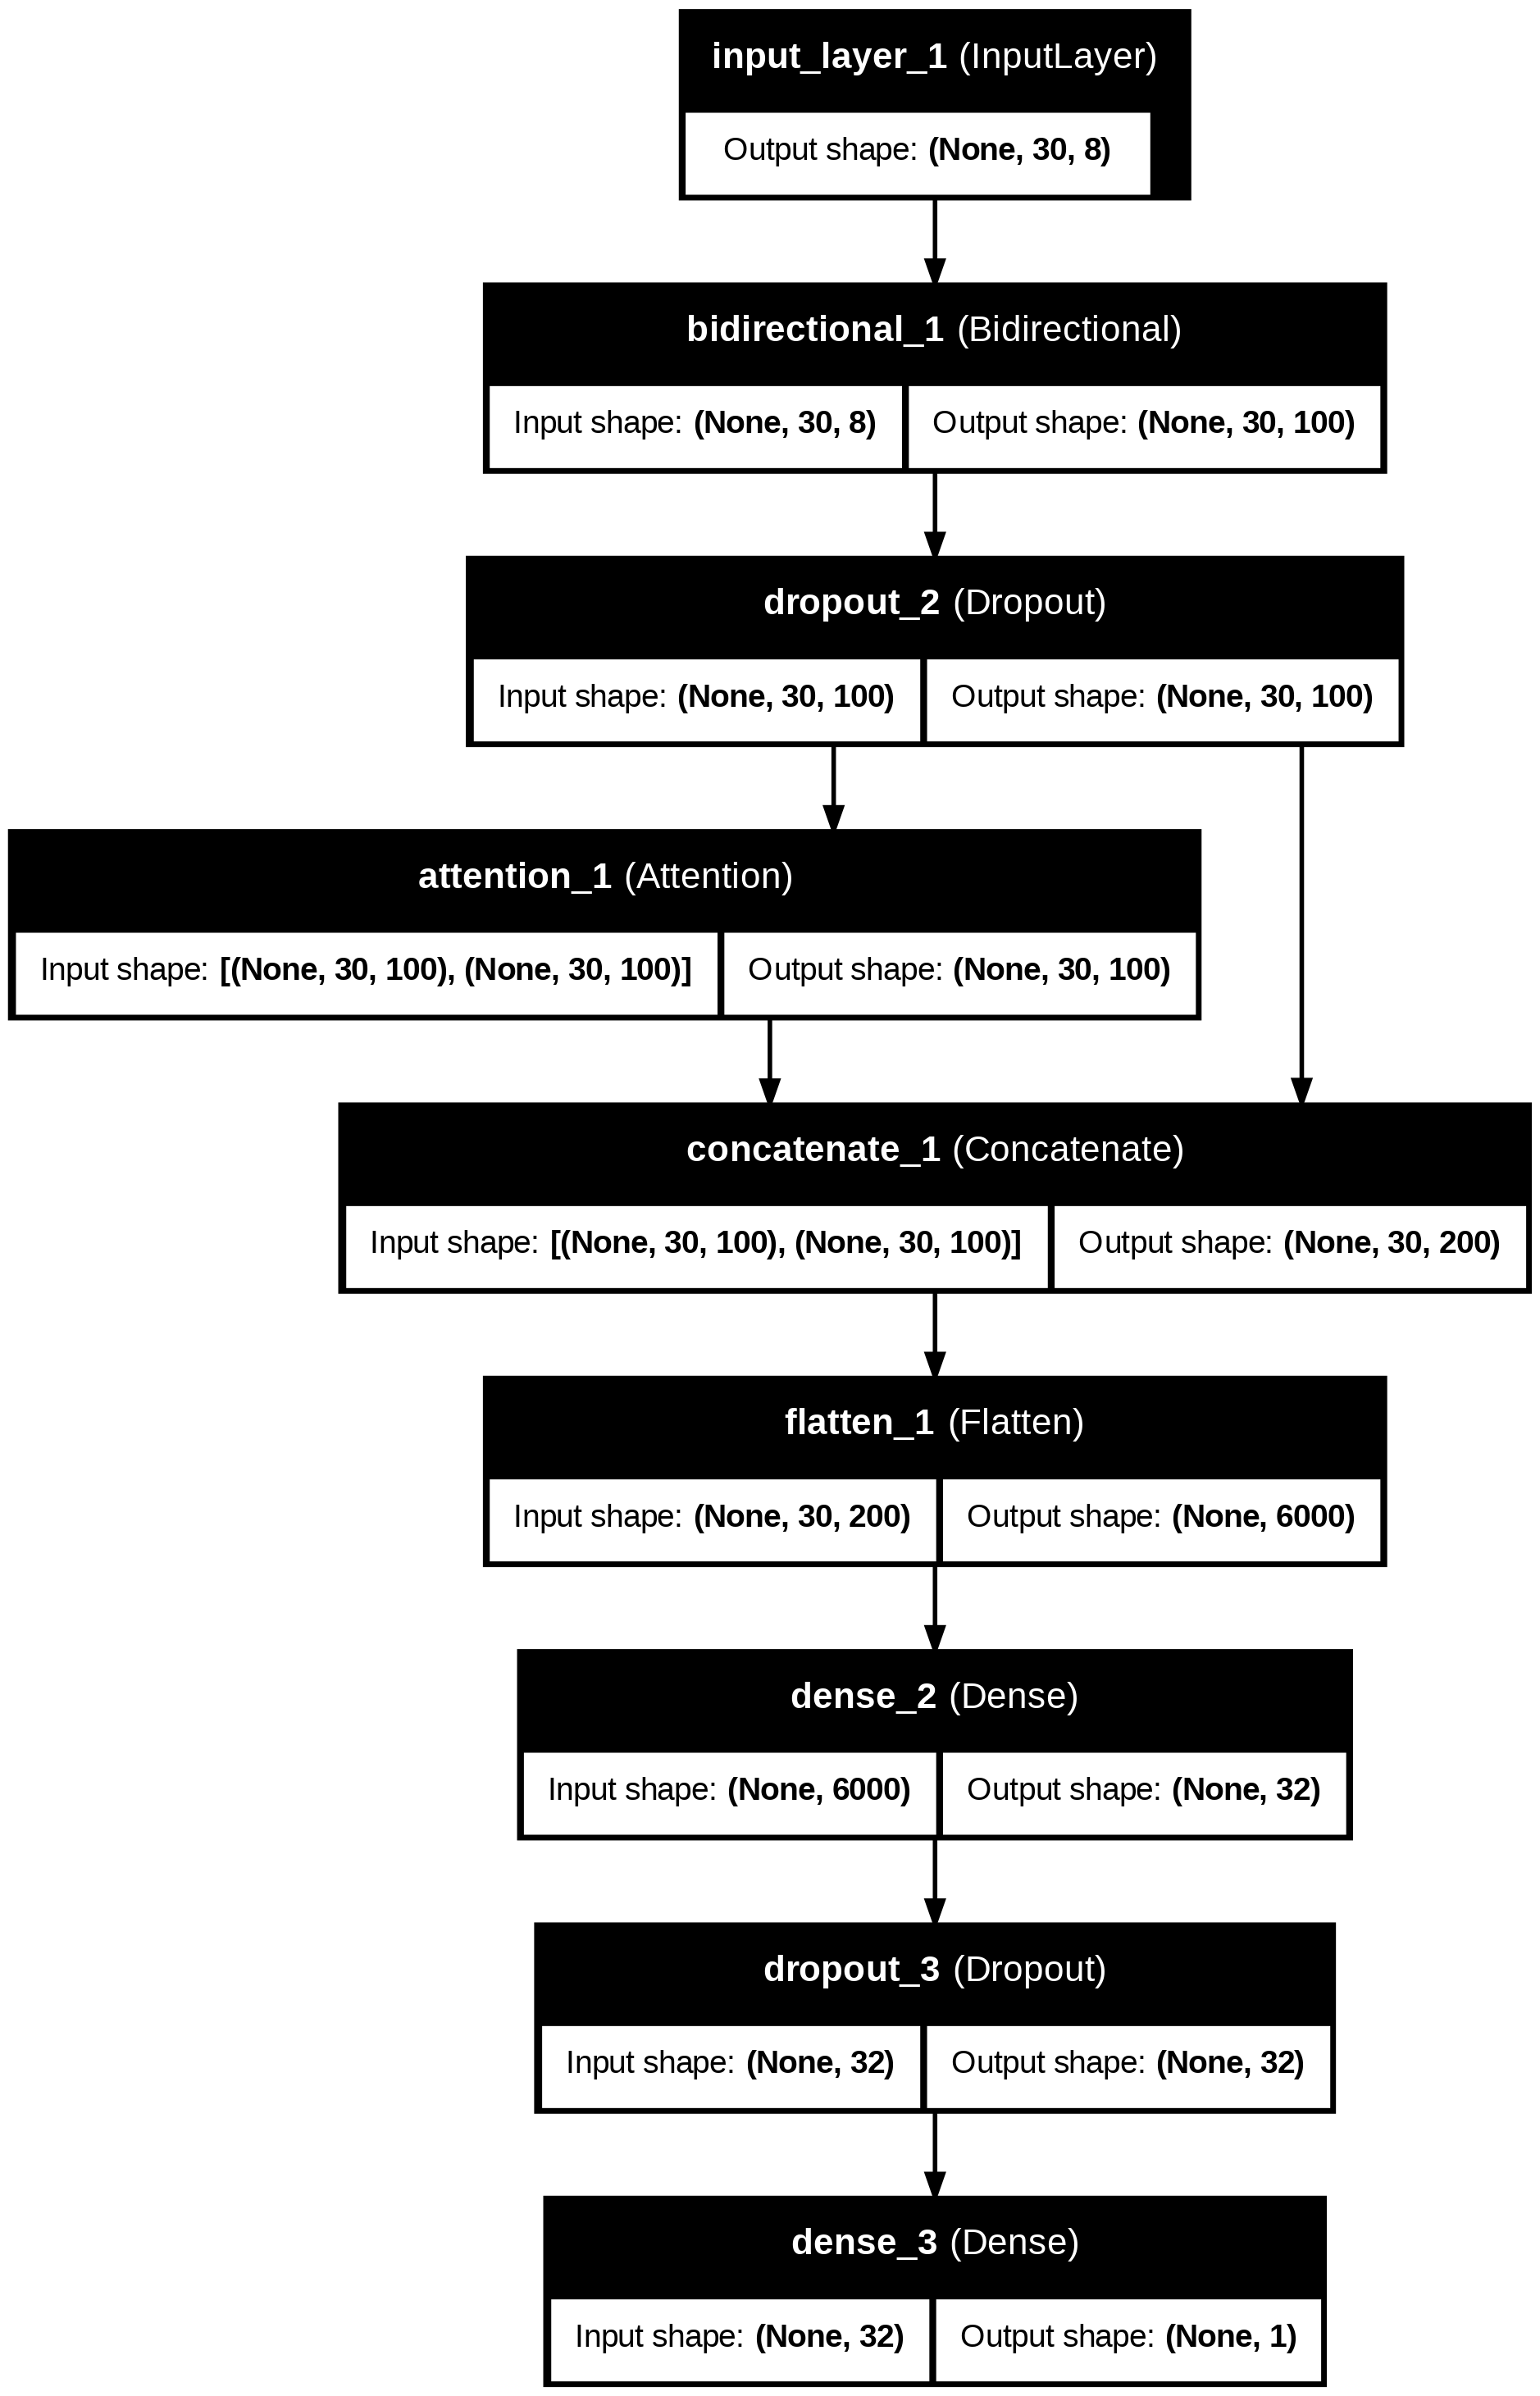

In [96]:
# Set seed for reproducibility
set_random_seeds()

# Define the reshape_for_lstm function
def reshape_for_lstm(X, sequence_length):
    """
    Reshape the input data for LSTM.

    Args:
    - X: Input feature data (2D array).
    - sequence_length: Number of timesteps to use.

    Returns:
    - X_reshaped: Reshaped input data for LSTM.

    The function creates sequences of data using a
    rolling window approach to match LSTM input shape.
    """
    X_reshaped = []  # List to hold reshaped sequences

    # Create sequences using a rolling window
    for i in range(len(X) - sequence_length + 1):
        X_reshaped.append(X[i:i + sequence_length])

    return np.array(X_reshaped)  # Convert to numpy array

# Custom RMSE metric
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

# Function to build and compile the LSTM model
def build_lstm_model(input_shape):
    """
    Build and compile an LSTM model with dropout,
    regularization, and attention mechanism.
    """
    inputs = Input(shape=input_shape)

    # BiLSTM with regularization
    x = Bidirectional(LSTM(50, return_sequences=True,
                           kernel_regularizer=l2(0.005)))(inputs)

    # Dropout to prevent overfitting
    x = Dropout(0.6)(x)

    # Attention mechanism for key features
    attention = Attention()([x, x])

    # Concatenate LSTM and attention outputs
    x = Concatenate()([x, attention])

    # Flatten layer
    x = Flatten()(x)

    # Dense layer with ReLU and increased regularization
    x = Dense(32, activation='relu', kernel_regularizer=l2(0.005))(x)

    # Dropout in dense layer
    x = Dropout(0.6)(x)

    # Output layer for regression
    outputs = Dense(1)(x)

    # Compile model with Adam, RMSE, MAE
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='mse', metrics=['mae', rmse])

    return model

# Define the sequence length
sequence_length = 30

# Reshape the combined training data for LSTM
X_train_reshaped = reshape_for_lstm(combined_X, sequence_length)
y_train_reshaped = combined_y[sequence_length - 1:]

# Confirm data shapes
print(f"X_train shape: {X_train_reshaped.shape}")
print(f"y_train shape: {y_train_reshaped.shape}")

# Split data into train and validation
split_ratio = 0.8
split_index = int(X_train_reshaped.shape[0] * split_ratio)
X_train, X_val = X_train_reshaped[:split_index], X_train_reshaped[split_index:]
y_train, y_val = y_train_reshaped[:split_index], y_train_reshaped[split_index:]

# Build the LSTM model
model = build_lstm_model(X_train.shape[1:])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5,
                               restore_best_weights=True)

# Train model with reduced epochs, validation, and early stopping
history = model.fit(X_train, y_train, epochs=50, batch_size=50,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping])

# Save the trained model after training completes
model.save('lstm_model.keras')

# Plot training and validation loss
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.show()

# Display model summary
model.summary()

# Visualize and save the model architecture
plot_model(model, to_file='lstm_model_architecture.png',
           show_shapes=True, show_layer_names=True)
display(Image(filename='lstm_model_architecture.png'))


# Evaluating the Performance of an LSTM Model

## Ensuring Reproducibility

To maintain consistency across different runs of the code, random seeds are set at the beginning. This step is essential in ensuring that the results are reproducible, especially when randomness is involved in processes such as data splitting or model initialization.

## Evaluating the Model's Performance

**Function**: `evaluate_model`

- **Purpose**:  
  The `evaluate_model` function assesses the performance of a trained LSTM model. The evaluation is carried out using key metrics such as Mean Absolute Error (MAE), Root Mean Square Error (RMSE), and the coefficient of determination (R²).

- **Process**:  
  The function makes predictions on the input features (`X`) using the trained model. If the data has been scaled, the scaler is applied to reverse the scaling of both the true target values (`y`) and the predictions. The function then calculates MAE, RMSE, and R², which are returned as a dictionary of metrics.

## Visualizing Evaluation Metrics

**Function**: `plot_metrics`

- **Purpose**:  
  The `plot_metrics` function creates visual representations of the evaluation metrics (MAE, RMSE, R²) to facilitate a clear comparison across different datasets or tickers.

- **Process**:  
  The function generates bar plots for each metric, providing a visual comparison of model performance. These plots are saved as image files to document the results effectively.

## Saving Evaluation Metrics as a Word Table

**Function**: `save_as_word_table`

- **Purpose**:  
  The `save_as_word_table` function saves the evaluation metrics into a Word document. This allows for a structured and formal presentation of the results, suitable for reporting purposes.

- **Process**:  
  The function converts a DataFrame containing the evaluation metrics into a Word table. The table is then saved as a `.docx` file, providing a professional format for presenting the model’s performance.

## Loading the Model and Custom RMSE Metric

- **Custom RMSE Metric**:  
  A custom RMSE function is defined and registered to ensure that the model can be evaluated correctly when loaded.

- **Loading the Model**:  
  The LSTM model, saved previously, is loaded using `load_model`. The custom RMSE metric is passed to ensure that it is recognized during the model evaluation.

## Evaluating the Model on Test and Extra Test Datasets

**Test Data Evaluation**:  
  The model's performance is evaluated on the test dataset. The data is first reshaped using the `reshape_for_lstm` function, and then the model's predictions are compared to the true target values. The evaluation metrics for each ticker in the test dataset are calculated and displayed.

**Extra Test Data Evaluation**:  
  The model is further evaluated on an additional test dataset (referred to as "Extra Test Data"). This step assesses the model’s ability to generalize to unseen data. Metrics for each ticker are calculated and displayed.

## Aggregating and Saving Results

**Creating a DataFrame for Results**:  
  The evaluation metrics from both the test and extra test datasets are combined into a single DataFrame. This provides a comprehensive overview of the model’s performance across different datasets and tickers.

**Saving and Displaying the Results**:  
  The combined metrics are saved in both CSV and Word document formats, ensuring that the results are well-documented and easily accessible. Additionally, the metrics are plotted and saved as visual charts, offering an intuitive way to compare model performance.

## Conclusion

This process provides a thorough evaluation of the LSTM model’s performance across different datasets. By calculating key metrics, visualizing the results, and saving them in multiple formats, the evaluation is both comprehensive and well-documented. This approach helps in understanding the model’s strengths and areas for improvement, guiding further refinements or confirming its readiness for deployment.


=== Test Data ===
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
SHEL: {'MAE': 59.944732666015625, 'RMSE': 62.0451161176229, 'R²': -3.9214837265958353}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
PSON: {'MAE': 30.526748657226562, 'RMSE': 34.71146643688456, 'R²': -2.5509639230712593}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
ULVR: {'MAE': 74.71649169921875, 'RMSE': 80.59049965208479, 'R²': -1.3596000347867165}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
REL: {'MAE': 25.199920654296875, 'RMSE': 32.742551295148786, 'R²': -0.344860574247531}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
UU: {'MAE': 9.467300415039062, 'RMSE': 11.251142319618026, 'R²': -0.33300827051585435}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
SSE: {'MAE': 14.246124267578125, 'RMSE': 17.180217581217413, 'R²': -0.16886294414462766}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
SGE: {'MAE': 42.76454162597656, 'RMSE': 46.47767412106612, 'R²': -3.264594095545334}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
AHT: {'MAE': 160.06005859375, 'RMSE': 175.03664151462485, 'R²': -0.

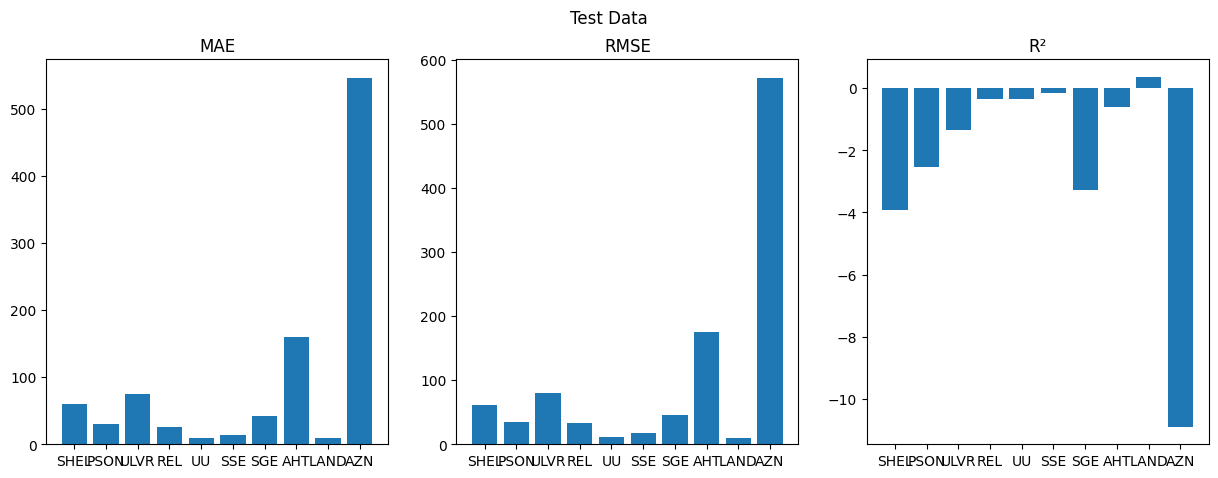

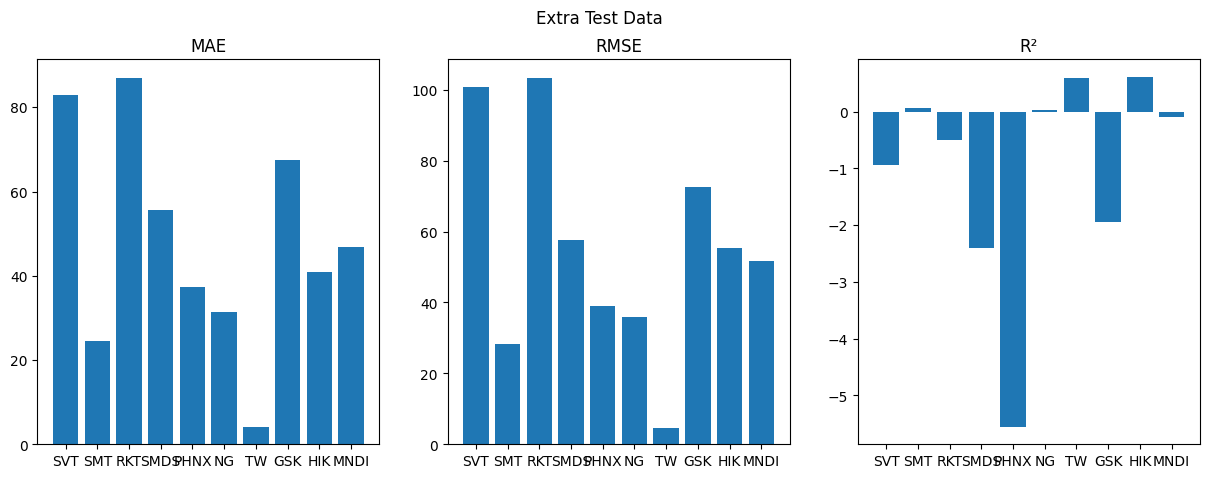

In [97]:
# Set random seeds for reproducibility
set_random_seeds()

# Set the sequence length
sequence_length = 30

def evaluate_model(model, X, y, scaler=None):
    """
    Evaluate model performance.

    Args:
    - model: Trained LSTM model.
    - X: Input features.
    - y: True target values.
    - scaler: Scaler to reverse scaling.

    Returns:
    - Dictionary with MAE, RMSE, R².
    """
    predictions = model.predict(X)

    if scaler is not None:
        y = scaler.inverse_transform(y.reshape(-1, 1)).flatten()
        predictions = scaler.inverse_transform(predictions).flatten()

    mae = mean_absolute_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r2 = r2_score(y, predictions)

    return {"MAE": mae, "RMSE": rmse, "R²": r2}

def plot_metrics(metrics, title):
    """
    Plot MAE, RMSE, R² values.

    Args:
    - metrics: Evaluation metrics dict.
    - title: Title for the plot.

    Returns:
    - None. Displays the plot.
    """
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].bar(metrics.keys(), [m["MAE"] for m in metrics.values()])
    ax[0].set_title('MAE')
    ax[1].bar(metrics.keys(), [m["RMSE"] for m in metrics.values()])
    ax[1].set_title('RMSE')
    ax[2].bar(metrics.keys(), [m["R²"] for m in metrics.values()])
    ax[2].set_title('R²')
    fig.suptitle(title)
    plt.savefig(f"{title}_metrics.png")
    plt.show()

def save_as_word_table(df, filename="evaluation_metrics.docx"):
    """
    Save the DataFrame as a Word table.

    Args:
    - df: DataFrame containing the metrics.
    - filename: Name of the Word file to save.
    """
    from docx import Document
    doc = Document()
    doc.add_heading('Evaluation Metrics', 0)

    # Add table to document
    table = doc.add_table(rows=(df.shape[0] + 1), cols=df.shape[1] + 1)

    # Adding headers
    hdr_cells = table.rows[0].cells
    hdr_cells[0].text = "Dataset/Ticker"
    for i, column_name in enumerate(df.columns):
        hdr_cells[i + 1].text = column_name

    # Adding data
    for i, idx in enumerate(df.index):
        row_cells = table.rows[i + 1].cells
        row_cells[0].text = str(idx)
        for j, value in enumerate(df.loc[idx]):
            row_cells[j + 1].text = str(value)

    # Save the document
    doc.save(filename)

from tensorflow.keras.utils import register_keras_serializable
from tensorflow.keras.models import load_model

@register_keras_serializable()
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

# Load the model with the custom RMSE metric
model = load_model('lstm_model.keras', custom_objects={'rmse': rmse})

all_metrics = {}

# Evaluate on test dataset
print("=== Test Data ===")
test_metrics = {}
for ticker, data in preprocessed_data['test'].items():
    X_test_reshaped = reshape_for_lstm(data['X'].values, sequence_length)
    y_test_reshaped = data['y'].values[sequence_length - 1:]
    scaler = data.get('target_scaler')
    metrics = evaluate_model(model, X_test_reshaped, y_test_reshaped, scaler)
    test_metrics[ticker] = metrics
    print(f"{ticker}: {metrics}")
all_metrics["Test Data"] = test_metrics

# Evaluate on extra test dataset
print("\n=== Extra Test Data ===")
extra_metrics = {}
for ticker, data in preprocessed_data['extra'].items():
    X_extra_reshaped = reshape_for_lstm(data['X'].values, sequence_length)
    y_extra_reshaped = data['y'].values[sequence_length - 1:]
    scaler = data.get('target_scaler')
    metrics = evaluate_model(model, X_extra_reshaped, y_extra_reshaped, scaler)
    extra_metrics[ticker] = metrics
    print(f"{ticker}: {metrics}")
all_metrics["Extra Test Data"] = extra_metrics

# Create DataFrame for results
df = pd.DataFrame.from_dict(
    {(i, j): all_metrics[i][j]
     for i in all_metrics.keys()
     for j in all_metrics[i].keys()},
    orient='index')

# Save and display table
df.to_csv('evaluation_metrics.csv')
save_as_word_table(df, "evaluation_metrics.docx")
print(df)  # Display DataFrame directly

# Plot and save metrics
plot_metrics(test_metrics, "Test Data")
plot_metrics(extra_metrics, "Extra Test Data")


# Hyperparameter Tuning and Training of an LSTM Model

## Ensuring Reproducibility

In the initial step, random seeds are set to ensure reproducibility of results across different runs. This is a critical practice in machine learning tasks, particularly when the process involves hyperparameter tuning and model training, where stochastic elements may affect outcomes.

## Defining a Custom RMSE Metric

**Function**: `rmse`

The `rmse` function calculates the Root Mean Square Error (RMSE), a key metric in regression tasks. RMSE is valuable because it provides a direct measure of prediction error by evaluating the square root of the average squared differences between predicted and actual values. This metric is particularly relevant when assessing the accuracy of a model in predicting continuous outcomes.

## Constructing the LSTM Model with Hyperparameter Tuning

**Function**: `build_lstm_model`

The `build_lstm_model` function is developed to construct and compile an LSTM model that accommodates hyperparameter tuning. The model’s architecture integrates advanced techniques, including bidirectional LSTM layers, attention mechanisms, and regularization strategies, to enhance its predictive performance.

### Key Hyperparameters:

The function allows tuning of several critical hyperparameters:
- **LSTM Units**: The number of units in the LSTM layer.
- **Dropout Rate**: The dropout rate applied to mitigate overfitting.
- **Regularization Strength**: The degree of L2 regularization applied to the LSTM and Dense layers.
- **Dense Units**: The number of units in the Dense layer.
- **Learning Rate**: The learning rate for the Adam optimizer.

### Model Architecture:

- **Input Layer**: Accepts a sequence of input features, assumed to be eight in this context.
- **Bidirectional LSTM Layer**: Designed to capture temporal dependencies in both forward and backward directions, with added regularization to prevent overfitting.
- **Dropout Layer**: Used to reduce the risk of overfitting by randomly deactivating a portion of the input units during training.
- **Attention Mechanism**: Enhances the model's ability to focus on significant features within the sequence.
- **Global Average Pooling Layer**: Reduces the dimensionality of the data, maintaining key information.
- **Dense Layer**: Incorporates a ReLU activation function with regularization to further refine the model's predictive capability.
- **Output Layer**: Provides the final regression output.

## Hyperparameter Tuning and Training

**Function**: `hyperparameter_tuning_and_training`

This function is central to the model's optimization. It performs hyperparameter tuning using Bayesian Optimization and subsequently trains the LSTM model with the optimal hyperparameters identified during the tuning process. The trained model's architecture and weights are then saved for future use, ensuring that the model can be reloaded and deployed as needed.

### Process Overview:

- **Early Stopping**: Implemented to monitor the validation loss and terminate training if there is no improvement over three consecutive epochs. This method effectively prevents overfitting by halting the training process when the model ceases to generalize well to unseen data.
- **Bayesian Optimization**: The `BayesianOptimization` tuner efficiently explores the hyperparameter space, identifying the combination of parameters that minimizes the validation loss.
- **Training**: Once the best hyperparameters are identified, the model is trained using these parameters. This step ensures that the model is optimized not only for the specific dataset but also for the chosen architecture and hyperparameter settings.
- **Model Saving**: The trained model is saved in multiple formats, including the full model (`.keras`), model weights (`.h5`), and model architecture (`.json`). This approach guarantees that the model can be preserved and utilized in future predictions or further training.

### Visualization:

The training process is visually analyzed by plotting the training and validation losses, as well as the Mean Absolute Error (MAE). These plots provide insight into the model's learning process, revealing how well it performs over the course of training.

### Output:

The function returns the trained model, the file path to the saved weights, and the best hyperparameters. These outputs are critical for further analysis, deployment, or additional training phases.

## Conclusion

This workflow integrates hyperparameter tuning and model training into a cohesive process. By employing Bayesian Optimization to explore the hyperparameter space and implementing advanced architectural techniques, the LSTM model is refined to deliver robust and accurate time series forecasting. The resulting model, along with its associated parameters and architecture, is saved for future use, ensuring its utility in subsequent applications.


Trial 20 Complete [00h 01m 29s]
val_loss: 0.03194175660610199

Best val_loss So Far: 0.03080904856324196
Total elapsed time: 00h 29m 48s

    The hyperparameter search is complete.
    Optimal LSTM units: 32
    Optimal Dense units: 16
    Optimal Dropout rate: 0.2
    Optimal Regularization strength: 5.363153798617825e-05
    Optimal Learning rate: 0.0026634587085010435
    
Epoch 1/50
624/624 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 0.1657 - mae: 0.2863 - rmse: 1.3342 - val_loss: 0.0831 - val_mae: 0.2384 - val_rmse: 0.3043
Epoch 2/50
624/624 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0949 - mae: 0.2280 - rmse: 1.3574 - val_loss: 0.0514 - val_mae: 0.1758 - val_rmse: 0.2603
Epoch 3/50
624/624 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.0853 - mae: 0.2168 - rmse: 1.3613 - val_loss: 0.0560 - val_mae: 0.1955 - val_rmse: 0.2670
Epoch 4/50
624/624 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.0728 - mae: 0.2029 - rmse: 1.3642 - val_loss: 0.0515 - val_mae: 0.1802 - val_rmse: 0.2569
Epoch 5/50

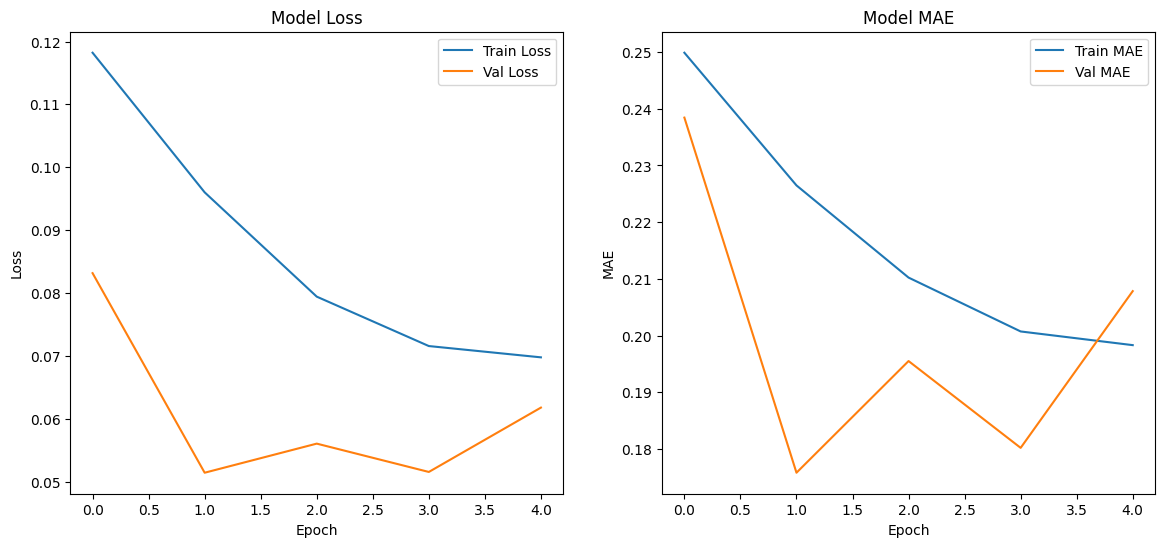

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, None, 8)        │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_1           │ (None, None, 64)       │         10,496 │ input_layer_1[0][0]    │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, None, 64)       │              0 │ bidirectional_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_1 (Attention)   │ (None, None, 64)       │              0 │ dropout_2[0][0],       │
│                           │                        │                │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, None, 128)      │              0 │ dropout_2[0][0],       │
│ (Concatenate)             │                        │                │ attention_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d… │ (None, 128)            │              0 │ concatenate_1[0][0]    │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 16)             │          2,064 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 16)             │              0 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 1)              │             17 │ dropout_3[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 37,733 (147.40 KB)

 Trainable params: 12,577 (49.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,156 (98.27 KB)

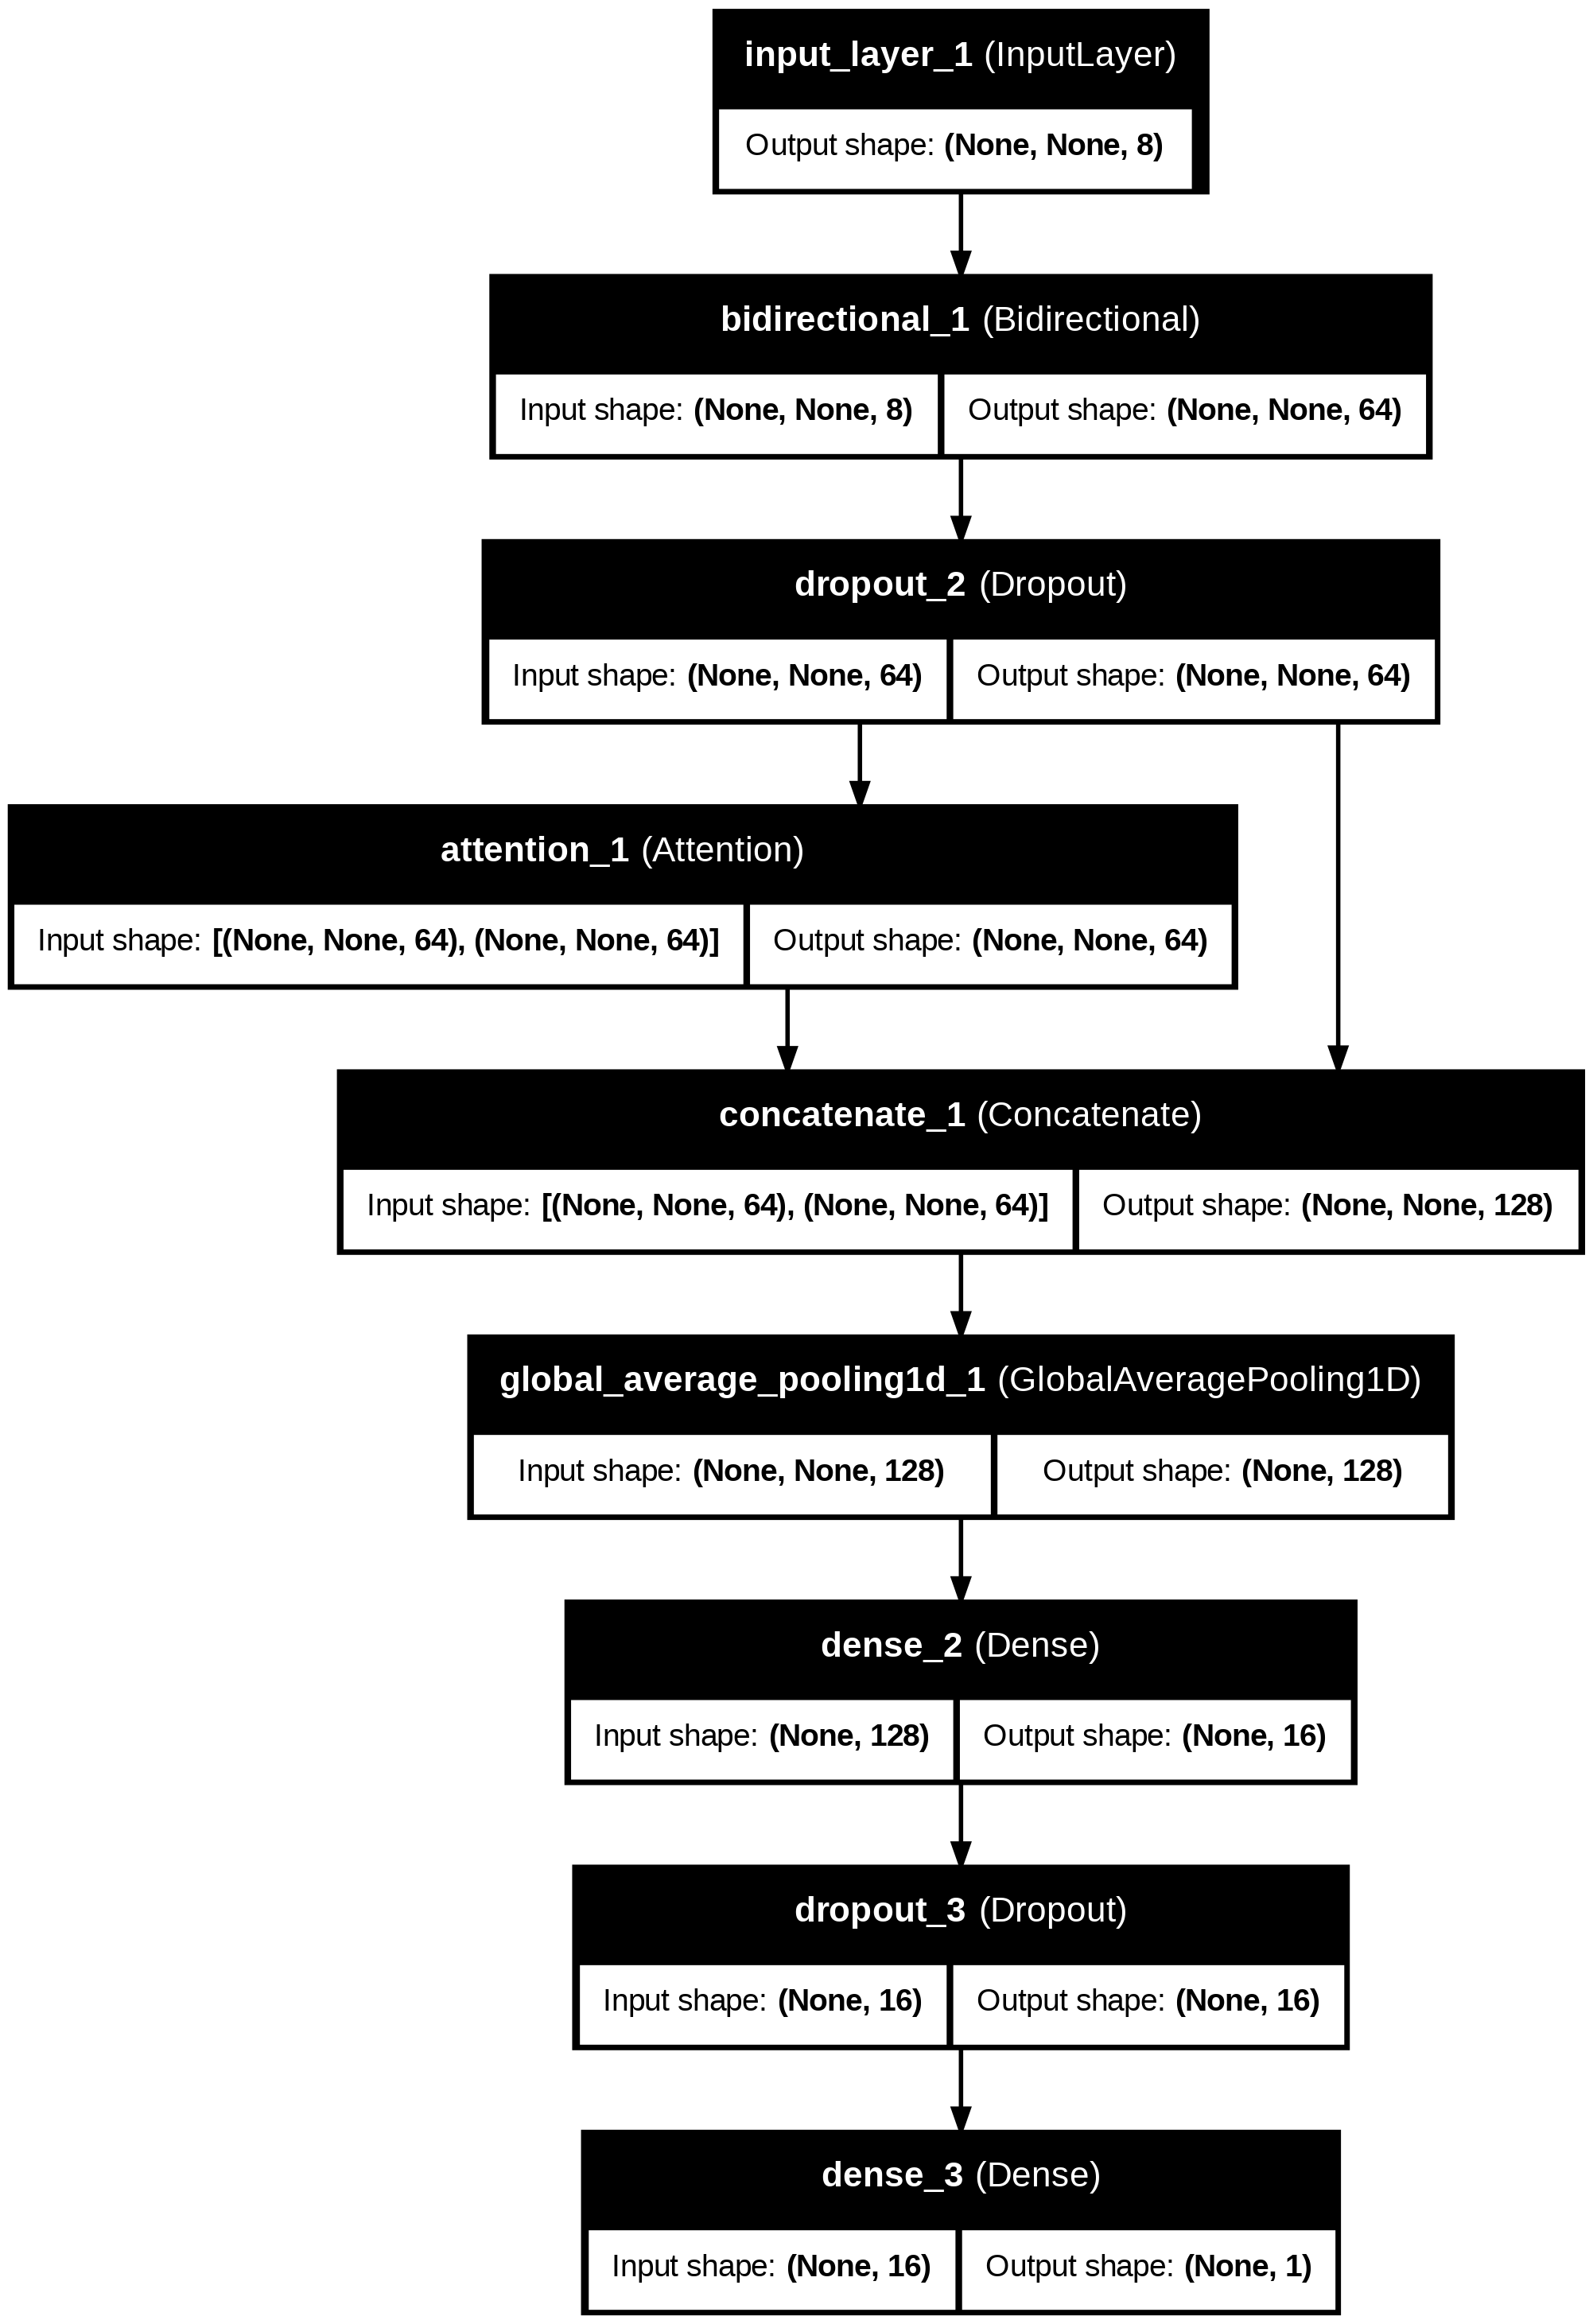

In [99]:
# Set random seeds for reproducibility
set_random_seeds()

# Custom RMSE metric
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

def build_lstm_model(hp):
    """
    Build and compile an LSTM model with hyperparameter tuning support.
    """
    inputs = Input(shape=(None, 8))  # Assuming 8 features

    # Tune the number of LSTM units
    lstm_units = hp.Int('lstm_units', min_value=32, max_value=128, step=32)

    # BiLSTM with regularization
    x = Bidirectional(LSTM(lstm_units, return_sequences=True,
                           kernel_regularizer=regularizers.l2(
                               hp.Float('regularization_strength',
                                        min_value=1e-5,
                                        max_value=1e-2,
                                        sampling='LOG'))))(inputs)

    # Dropout to prevent overfitting
    dropout_rate = hp.Float('dropout_rate', min_value=0.2, max_value=0.7,
                            step=0.1)
    x = Dropout(dropout_rate)(x)

    # Attention mechanism for key features
    attention = Attention()([x, x])

    # Concatenate LSTM and attention outputs
    x = Concatenate()([x, attention])

    # Global Average Pooling layer
    x = GlobalAveragePooling1D()(x)

    # Dense layer with ReLU and increased regularization
    dense_units = hp.Int('dense_units', min_value=16, max_value=64, step=16)
    x = Dense(dense_units, activation='relu',
              kernel_regularizer=regularizers.l2(
                  hp.Float('dense_regularization_strength',
                           min_value=1e-5,
                           max_value=1e-2,
                           sampling='LOG')))(x)

    # Dropout in dense layer
    x = Dropout(dropout_rate)(x)

    # Output layer for regression
    outputs = Dense(1)(x)

    # Compile model with Adam, RMSE, MAE
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2,
                             sampling='LOG')
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='mse', metrics=['mae', rmse])

    return model

def hyperparameter_tuning_and_training(X_train, y_train, X_val, y_val,
                                       tuner_directory='lstm_tuning',
                                       project_name='bayesian_optimization_lstm'):
    """
    Perform hyperparameter tuning, train the model with the best hyperparameters,
    save the trained model's weights, and return the trained model.
    """
    # Define the early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=3,
                                   restore_best_weights=True)

    # Initialize the Bayesian Optimization tuner
    tuner = BayesianOptimization(
        build_lstm_model,
        objective='val_loss',  # Optimize based on validation loss (MSE)
        max_trials=20,
        executions_per_trial=1,
        directory=tuner_directory,
        project_name=project_name
    )

    # Start the hyperparameter search
    tuner.search(X_train, y_train,
                 epochs=50,
                 batch_size=32,
                 validation_data=(X_val, y_val),
                 callbacks=[early_stopping])

    # Get the best hyperparameters
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

    print(f"""
    The hyperparameter search is complete.
    Optimal LSTM units: {best_hps.get('lstm_units')}
    Optimal Dense units: {best_hps.get('dense_units')}
    Optimal Dropout rate: {best_hps.get('dropout_rate')}
    Optimal Regularization strength: {best_hps.get('regularization_strength')}
    Optimal Learning rate: {best_hps.get('learning_rate')}
    """)

    # Build the final model with the best hyperparameters
    ht_model = tuner.hypermodel.build(best_hps)

    # Train the model with the best hyperparameters
    history = ht_model.fit(X_train, y_train, epochs=50, batch_size=32,
                           validation_data=(X_val, y_val),
                           callbacks=[early_stopping])

    # Save the trained model
    ht_model.save('trained_ht_lstm_model.keras')
    print("Trained model saved to 'trained_ht_lstm_model.keras'")

    # Save the model weights with the correct extension
    weights_file = 'trained_ht_lstm.weights.h5'
    ht_model.save_weights(weights_file)
    print(f"Model weights saved to {weights_file}")

    # Verify that the weights have been saved
    if os.path.exists(weights_file):
        print("Weights file successfully created.")
    else:
        print("Error: Weights file not found.")

    # Save the model architecture
    model_json = ht_model.to_json()
    with open("trained_ht_lstm_model.json", "w") as json_file:
        json_file.write(model_json)
    print("Model architecture saved to trained_ht_lstm_model.json")

    # Plot training and validation loss
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training and validation MAE
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Train MAE')
    plt.plot(history.history['val_mae'], label='Val MAE')
    plt.title('Model MAE')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.legend()

    plt.show()

    # Display model summary
    ht_model.summary()

    # Visualize and save the model architecture
    plot_model(ht_model, to_file='ht_lstm_model_architecture.png',
               show_shapes=True, show_layer_names=True)
    display(Image(filename='ht_lstm_model_architecture.png'))

    # Return the model, the path to the weights file, and best hyperparameters
    return ht_model, weights_file, best_hps

# Call function with the training and validation data
ht_model, weights_file, best_hps = hyperparameter_tuning_and_training(
    X_train, y_train, X_val, y_val
)


In [102]:
# Set random seeds for reproducibility
set_random_seeds()

# Set the sequence length
sequence_length = 30

def evaluate_model(model, X, y, scaler=None):
    """
    Evaluate model performance.

    Args:
    - model: Trained LSTM model.
    - X: Input features.
    - y: True target values.
    - scaler: Scaler to reverse scaling.

    Returns:
    - Dictionary with MAE, RMSE, R².
    """
    predictions = model.predict(X)

    if scaler is not None:
        y = scaler.inverse_transform(y.reshape(-1, 1)).flatten()
        predictions = scaler.inverse_transform(predictions).flatten()

    mae = mean_absolute_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r2 = r2_score(y, predictions)

    return {"MAE": mae, "RMSE": rmse, "R²": r2}

def plot_metrics(metrics, title):
    """
    Plot MAE, RMSE, R² values.

    Args:
    - metrics: Evaluation metrics dict.
    - title: Title for the plot.

    Returns:
    - None. Displays the plot.
    """
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].bar(metrics.keys(), [m["MAE"] for m in metrics.values()])
    ax[0].set_title('MAE')
    ax[1].bar(metrics.keys(), [m["RMSE"] for m in metrics.values()])
    ax[1].set_title('RMSE')
    ax[2].bar(metrics.keys(), [m["R²"] for m in metrics.values()])
    ax[2].set_title('R²')
    fig.suptitle(title)
    plt.savefig(f"{title}_metrics.png")
    plt.show()

def save_as_word_table(df, filename="evaluation_metrics.docx"):
    """
    Save the DataFrame as a Word table.

    Args:
    - df: DataFrame containing the metrics.
    - filename: Name of the Word file to save.
    """
    from docx import Document
    doc = Document()
    doc.add_heading('Evaluation Metrics', 0)

    # Add table to document
    table = doc.add_table(rows=(df.shape[0] + 1), cols=df.shape[1] + 1)

    # Adding headers
    hdr_cells = table.rows[0].cells
    hdr_cells[0].text = "Dataset/Ticker"
    for i, column_name in enumerate(df.columns):
        hdr_cells[i + 1].text = column_name

    # Adding data
    for i, idx in enumerate(df.index):
        row_cells = table.rows[i + 1].cells
        row_cells[0].text = str(idx)
        for j, value in enumerate(df.loc[idx]):
            row_cells[j + 1].text = str(value)

    # Save the document
    doc.save(filename)

from tensorflow.keras.utils import register_keras_serializable
from tensorflow.keras.models import load_model

@register_keras_serializable()
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

# Load the model architecture from JSON
with open('trained_ht_lstm_model.json', 'r') as json_file:
    loaded_model_json = json_file.read()
model = model_from_json('trained_ht_lstm_model.json')

# Compile the model
model.compile(optimizer=Adam(learning_rate=best_hps['learning_rate']),
              loss='mse', metrics=['mae', rmse])

all_metrics = {}

# Evaluate on test dataset
print("=== Test Data ===")
test_metrics = {}
for ticker, data in preprocessed_data['test'].items():
    X_test_reshaped = reshape_for_lstm(data['X'].values, sequence_length)
    y_test_reshaped = data['y'].values[sequence_length - 1:]
    scaler = data.get('target_scaler')
    metrics = evaluate_model(model, X_test_reshaped, y_test_reshaped, scaler)
    test_metrics[ticker] = metrics
    print(f"{ticker}: {metrics}")
all_metrics["Test Data"] = test_metrics

# Evaluate on extra test dataset
print("\n=== Extra Test Data ===")
extra_metrics = {}
for ticker, data in preprocessed_data['extra'].items():
    X_extra_reshaped = reshape_for_lstm(data['X'].values, sequence_length)
    y_extra_reshaped = data['y'].values[sequence_length - 1:]
    scaler = data.get('target_scaler')
    metrics = evaluate_model(model, X_extra_reshaped, y_extra_reshaped, scaler)
    extra_metrics[ticker] = metrics
    print(f"{ticker}: {metrics}")
all_metrics["Extra Test Data"] = extra_metrics

# Create DataFrame for results
df = pd.DataFrame.from_dict(
    {(i, j): all_metrics[i][j]
     for i in all_metrics.keys()
     for j in all_metrics[i].keys()},
    orient='index')

# Save and display table
df.to_csv('evaluation_metrics.csv')
save_as_word_table(df, "evaluation_metrics.docx")
print(df)  # Display DataFrame directly

# Plot and save metrics
plot_metrics(test_metrics, "Test Data")
plot_metrics(extra_metrics, "Extra Test Data")


NameError: name 'model_from_json' is not defined

In [ ]:
def train_xgb_model(X_train, X_val, y_train, y_val, params=None, num_boost=100,
                    seed_value=42):
    """
    Train the XGBoost model using the provided training and validation data
     with early stopping.

    Args:
    - X_train: Training features.
    - X_val: Validation features.
    - y_train: Training targets.
    - y_val: Validation targets.
    - params: XGBoost parameters.
    - num_boost: Number of boosting rounds.
    - seed_value: Seed for reproducibility.

    Returns:
    - model: Trained XGBoost model.
    - evals_result: Dictionary with training and validation metrics.
    """
    # Ensure reproducibility
    set_random_seeds(seed_value)

    # Default parameters for XGBoost
    if params is None:
        params = {
            'objective': 'reg:squarederror',
            'eval_metric': ['mae', 'rmse'],
            'learning_rate': 0.1,
            'max_depth': 6,
            'seed': seed_value
        }

    # Convert data to DMatrix format for XGBoost
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dval = xgb.DMatrix(X_val, label=y_val)

    evals_result = {}

    # Train the model with early stopping
    model = xgb.train(params, dtrain, num_boost, evals=[(dtrain, 'train'),
     (dval, 'val')],
                      evals_result=evals_result, early_stopping_rounds=10,

                      verbose_eval=True)

    # Plot training MAE and validation MSE
    plt.figure(figsize=(12, 6))

    # Plot Training MAE
    plt.subplot(1, 2, 1)
    plt.plot(evals_result['train']['mae'], label='Training MAE')
    plt.title('Training MAE Over Rounds')
    plt.xlabel('Rounds')
    plt.ylabel('MAE')
    plt.legend()

    # Plot Validation MSE
    plt.subplot(1, 2, 2)
    plt.plot(np.square(evals_result['val']['rmse']), label='Validation MSE')
    plt.title('Validation MSE Over Rounds')
    plt.xlabel('Rounds')
    plt.ylabel('MSE')
    plt.legend()

    plt.show()

    return model



# Split the combined data into training and validation sets
X_tr, X_val, y_tr, y_val = \
prepare_data_for_xgboost(combined_X, combined_y)

# Train the XGBoost model using the correct variable names
model = train_xgb_model(X_tr, X_val, y_tr, y_val, seed_value=42)


# Save the trained model
model.save_model('xgb_model.json')


In [62]:
# Set random seeds for reproducibility
set_random_seeds()

def evaluate_xgb_model(model, X, y, scaler=None):
    """
    Evaluate XGBoost model performance.

    Args:
    - model: Trained XGBoost model.
    - X: Input features.
    - y: True target values.
    - scaler: Scaler to reverse scaling.

    Returns:
    - Dictionary with MAE, RMSE, R².
    """
    # Convert the data to DMatrix format
    dmatrix = xgb.DMatrix(X)

    # Predict using the XGBoost model
    predictions = model.predict(dmatrix)

    # If a scaler is provided, reverse the scaling of the predictions and targets
    if scaler is not None:
        y = scaler.inverse_transform(y.reshape(-1, 1)).flatten()
        predictions = scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()

    # Calculate metrics
    mae = mean_absolute_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r2 = r2_score(y, predictions)

    return {"MAE": mae, "RMSE": rmse, "R²": r2}


# Load the trained XGBoost model
model = xgb.Booster()
model.load_model('xgb_model.json')

all_metrics = {}

# Evaluate on test dataset
print("=== Test Data ===")
test_metrics = {}
for ticker, data in preprocessed_data['test'].items():
    X_test_reshaped = data['X'].values
    y_test_reshaped = data['y'].values
    scaler = data.get('targ_scaler')
    metrics = evaluate_xgb_model(model, X_test_reshaped, y_test_reshaped,
                                 scaler)
    test_metrics[ticker] = metrics
    print(f"{ticker}: {metrics}")
all_metrics["Test Data"] = test_metrics

# Evaluate on extra test dataset
print("\n=== Extra Test Data ===")
extra_metrics = {}
for ticker, data in preprocessed_data['extra'].items():
    X_extra_reshaped = data['X'].values
    y_extra_reshaped = data['y'].values
    scaler = data.get('targ_scaler')
    metrics = evaluate_xgb_model(model, X_extra_reshaped, y_extra_reshaped,
                                 scaler)
    extra_metrics[ticker] = metrics
    print(f"{ticker}: {metrics}")
all_metrics["Extra Test Data"] = extra_metrics

# Create DataFrame for results
df = pd.DataFrame.from_dict(
    {(i, j): all_metrics[i][j]
     for i in all_metrics.keys()
     for j in all_metrics[i].keys()},
    orient='index')

# Save and display table
df.to_csv('xgb_evaluation_metrics.csv')
save_as_word_table(df, "xgb_evaluation_metrics.docx")

# Display the DataFrame directly
print(df)  # Display DataFrame directly


NameError: name 'prepare_data_for_xgboost' is not defined

In [ ]:
# Set random seeds for reproducibility
set_random_seeds()


def fine_tune_and_retrain(X_tr, X_val, y_tr, y_val, lb, ub, swarmsize=20, maxiter=50):
    """
    Fine-tune the XGBoost model using Particle Swarm Optimization (PSO) and retrain it with the best-found parameters.

    Args:
    - X_tr: Training features (numpy array or pandas DataFrame).
    - X_val: Validation features (numpy array or pandas DataFrame).
    - y_tr: Training targets (numpy array or pandas Series).
    - y_val: Validation targets (numpy array or pandas Series).
    - lb: List of lower bounds for hyperparameters [learning_rate, max_depth, subsample, colsample_bytree].
    - ub: List of upper bounds for hyperparameters [learning_rate, max_depth, subsample, colsample_bytree].
    - swarmsize: Number of particles in the PSO (default=20).
    - maxiter: Maximum number of iterations for PSO (default=50).

    Returns:
    - final_model: The retrained XGBoost model with optimized hyperparameters.
    """

    # Define the PSO objective function
    def pso_objective(params):
        """
        Objective function for PSO to minimize the RMSE on the validation set.

        Args:
        - params: A list of hyperparameters [learning_rate, max_depth, subsample, colsample_bytree].

        Returns:
        - rmse: The root mean squared error on the validation set.
        """
        learning_rate, max_depth, subsample, colsample_bytree = params

        # Initialize the XGBoost model with current hyperparameters
        model = xgb.XGBRegressor(
            learning_rate=learning_rate,
            max_depth=int(max_depth),  # max_depth needs to be an integer
            subsample=subsample,
            colsample_bytree=colsample_bytree,
            eval_metric='rmse',
            seed=42  # Ensures reproducibility
        )

        # Train the model on the training data and evaluate on the validation data
        model.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], verbose=False)

        # Predict on the validation set and calculate RMSE
        predictions = model.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, predictions))

        return rmse

    # Perform PSO to find the best hyperparameters
    best_params, best_score = pso(pso_objective, lb, ub, swarmsize=swarmsize, maxiter=maxiter)

    # Print the best parameters found by PSO
    print(f"Best Parameters: {best_params}")
    print(f"Best RMSE: {best_score}")

    # Retrain the model with the best hyperparameters found by PSO
    final_model = xgb.XGBRegressor(
        learning_rate=best_params[0],
        max_depth=int(best_params[1]),
        subsample=best_params[2],
        colsample_bytree=best_params[3],
        eval_metric='rmse',
        seed=42
    )

    # Train the model on the full training data
    final_model.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], early_stopping_rounds=10, verbose=True)

    return final_model


    # Perform PSO to find the best hyperparameters
    best_params, best_score = pso(pso_objective, lb, ub,
                                  swarmsize=swarmsize, maxiter=maxiter)

    # Print the best parameters found by PSO
    print(f"Best Parameters: {best_params}")
    print(f"Best RMSE: {best_score}")

    # Retrain the model with the best hyperparameters found by PSO
    final_model = xgb.XGBRegressor(
        learning_rate=best_params[0],
        max_depth=int(best_params[1]),
        subsample=best_params[2],
        colsample_bytree=best_params[3],
        eval_metric='rmse',
        seed=42
    )

    # Train the model on the full training data
    final_model.fit(X_tr, y_tr, eval_set=[(X_val, y_val)],
                    early_stopping_rounds=10, verbose=True)

    # Save the model as a JSON file
    final_model.save_model('pso_fine_tuned_xgb_model.json')
    print("Model saved as pso_fine_tuned_xgb_model.json")

    return final_model

# Define the bounds for PSO hyperparameter search
lower_bounds = [0.01, 3, 0.5, 0.5]
upper_bounds = [0.3, 10, 1.0, 1.0]

final_model = fine_tune_and_retrain(X_tr, X_val, y_tr, y_val,
lower_bounds, upper_bounds)


In [ ]:
# Set random seeds for reproducibility
set_random_seeds()

def evaluate_xgb_model(model, X, y, scaler=None):
    """
    Evaluate XGBoost model performance.

    Args:
    - model: Trained XGBoost model.
    - X: Input features.
    - y: True target values.
    - scaler: Scaler to reverse scaling.

    Returns:
    - Dictionary with MAE, RMSE, R².
    """
    # Convert the data to DMatrix format
    dmatrix = xgb.DMatrix(X)

    # Predict using the XGBoost model
    predictions = model.predict(dmatrix)

    # If a scaler is provided, reverse the scaling of the predictions and targets
    if scaler is not None:
        y = scaler.inverse_transform(y.reshape(-1, 1)).flatten()
        predictions = scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()

    # Calculate metrics
    mae = mean_absolute_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r2 = r2_score(y, predictions)

    return {"MAE": mae, "RMSE": rmse, "R²": r2}


# Load the saved model
loaded_model = xgb.Booster()
loaded_model.load_model('pso_fine_tuned_xgb_model.json')
# Evaluate on test dataset
print("=== Test Data ===")

test_metrics = {}
for ticker, data in preprocessed_data['test'].items():
    X_test_reshaped = data['X'].values
    y_test_reshaped = data['y'].values
    scaler = data.get('targ_scaler')
    metrics = evaluate_xgb_model(model, X_test_reshaped, y_test_reshaped, scaler)
    test_metrics[ticker] = metrics
    print(f"{ticker}: {metrics}")


# Evaluate on extra test dataset
print("\n=== Extra Test Data ===")
extra_metrics = {}
for ticker, data in preprocessed_data['extra'].items():
    X_extra_reshaped = data['X'].values
    y_extra_reshaped = data['y'].values
    scaler = data.get('targ_scaler')
    metrics = evaluate_xgb_model(model, X_extra_reshaped,
                                 y_extra_reshaped, scaler)
    extra_metrics[ticker] = metrics
    print(f"{ticker}: {metrics}")
all_metrics["Extra Test Data"] = extra_metrics

# Create DataFrame for results
df = pd.DataFrame.from_dict(
    {(i, j): all_metrics[i][j]
     for i in all_metrics.keys()
     for j in all_metrics[i].keys()},
    orient='index')

# Save and display table
df.to_csv('xgb_evaluation_metrics.csv')
save_as_word_table(df, "xgb_evaluation_metrics.docx")

# Display the DataFrame directly
print(df)


Fold 1:
  Training MAE: 0.0828
  Validation RMSE: 0.3082
Fold 2:
  Training MAE: 0.1325
  Validation RMSE: 0.1737
Fold 3:
  Training MAE: 0.1228
  Validation RMSE: 0.2402
Fold 4:
  Training MAE: 0.1259
  Validation RMSE: 0.1878
Fold 5:
  Training MAE: 0.1328
  Validation RMSE: 0.1961


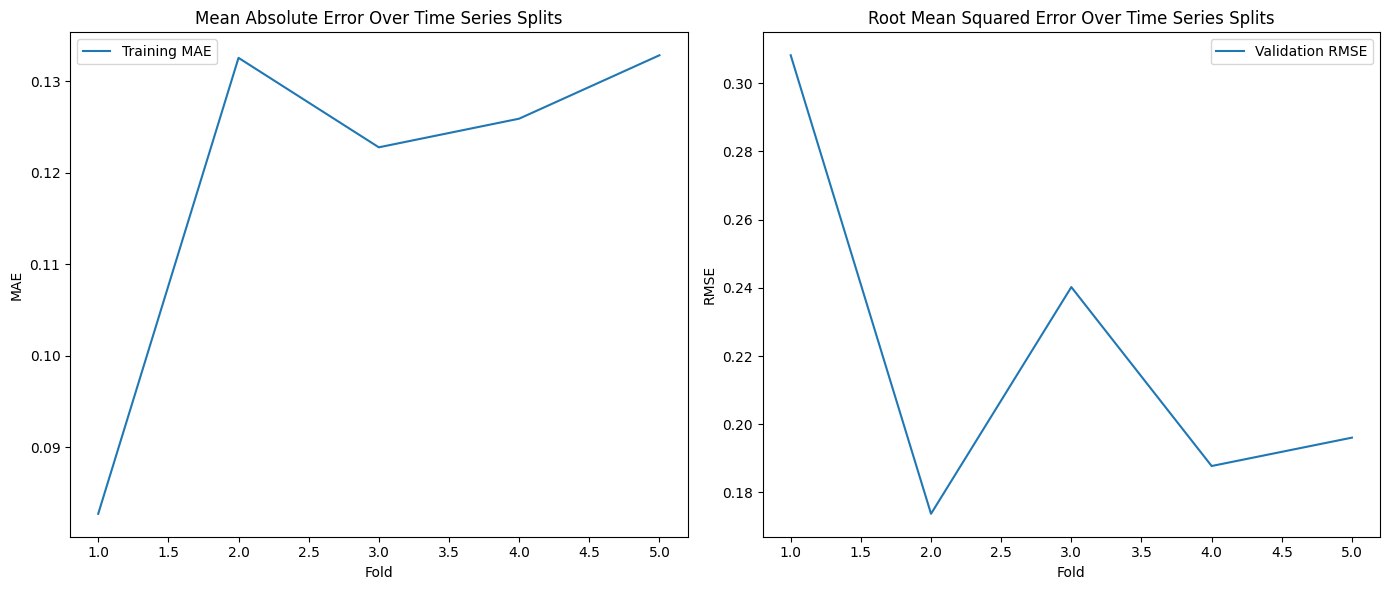

In [77]:
# Set random seeds for reproducibility.
def set_random_seeds(seed=42):
    """
    Set a random seed for reproducibility.

    Args:
    - seed (int): Random seed value. Default is 42.
    """
    np.random.seed(seed)

set_random_seeds()

def combine_hist_train_datasets(preprocessed_data):
    """
    Combine historical training datasets.

    Args:
    - preprocessed_data: Dict with preprocessed data.

    Returns:
    - combined_X: Combined input features.
    - combined_y: Combined target values.

    This function combines the features (X) and target
    values (y) from all tickers in the training data.
    """
    combined_X = []  # List to hold combined features
    combined_y = []  # List to hold combined targets

    # Loop through each ticker's training data
    for ticker, data in preprocessed_data['train'].items():
        combined_X.append(data['X'])  # Append feature data
        combined_y.append(data['y']) # Append target data

    # Vertically stack features from all tickers
    combined_X = np.vstack(combined_X)
    # Concatenate target values into one array
    combined_y = np.concatenate(combined_y)

    return combined_X, combined_y

def log_training_metrics_time_split(X_train, y_train, kernel='rbf',
                                    C=10, epsilon=0.1, gamma=0.1, n_splits=5):
    """
    Train an SVR model using time series split cross-validation and
    log training metrics at each split.

    Args:
    - X_train: Training features.
    - y_train: Training targets.
    - kernel: Kernel type to be used in the algorithm.
    - C: Regularization parameter.
    - epsilon: Epsilon in the epsilon-SVR model.
    - gamma: Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.
    - n_splits: Number of splits for time series validation.

    Returns:
    - metrics_log: Dictionary with keys 'train_mae', 'val_rmse'.
    - final_model: The SVR model trained on the last time split.
    """
    tscv = TimeSeriesSplit(n_splits=n_splits)

    metrics_log = {
        'train_mae': [],
        'val_rmse': []
    }

    final_model = None  # Variable to hold the model from the last time split

    fold = 1
    for train_index, val_index in tscv.split(X_train):
        X_train_split, X_val_split = X_train[train_index], X_train[val_index]
        y_train_split, y_val_split = y_train[train_index], y_train[val_index]

        # Create and train the SVR model
        model = SVR(kernel=kernel, C=C, epsilon=epsilon, gamma=gamma)
        model.fit(X_train_split, y_train_split)

        train_predictions = model.predict(X_train_split)
        val_predictions = model.predict(X_val_split)

        train_mae = mean_absolute_error(y_train_split, train_predictions)
        val_rmse = np.sqrt(mean_squared_error(y_val_split, val_predictions))

        metrics_log['train_mae'].append(train_mae)
        metrics_log['val_rmse'].append(val_rmse)

        print(f"Fold {fold}:")
        print(f"  Training MAE: {train_mae:.4f}")
        print(f"  Validation RMSE: {val_rmse:.4f}")

        # Save current model as the final model (last one from final split)
        final_model = model

        fold += 1

    return metrics_log, final_model

def plot_training_metrics(metrics_log):
    """
    Plot the logged training metrics over the time series splits.

    Args:
    - metrics_log: Dictionary with logged metrics from time series validation.
    """
    folds = range(1, len(metrics_log['train_mae']) + 1)

    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(folds, metrics_log['train_mae'], label='Training MAE')
    plt.xlabel('Fold')
    plt.ylabel('MAE')
    plt.title('Mean Absolute Error Over Time Series Splits')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(folds, metrics_log['val_rmse'], label='Validation RMSE')
    plt.xlabel('Fold')
    plt.ylabel('RMSE')
    plt.title('Root Mean Squared Error Over Time Series Splits')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Combine datasets
combined_X, combined_y = combine_hist_train_datasets(preprocessed_data)

# Log training metrics using the RBF kernel with time series split validation
metrics_log, model = log_training_metrics_time_split(combined_X, combined_y,
                                                     kernel='rbf')

# Plot training metrics
plot_training_metrics(metrics_log)


In [86]:
def evaluate_svm_model(model, X, y, scaler=None):
    """
    Evaluate SVM model performance on a dataset.

    Args:
    - model: Trained SVM model.
    - X: Input features for the evaluation dataset.
    - y: Actual target values for the evaluation dataset.
    - scaler: (Optional) Scaler object to reverse scaling, if scaling was applied.

    Returns:
    - Dictionary containing evaluation metrics: MAE, MSE, R².
    """
    # Convert DataFrame to NumPy array before prediction
    X = X.values

    # Predict the target values using the SVM model
    predictions = model.predict(X)

    # Ensure y is a NumPy array for reshaping
    y = y.values  # Convert y to a NumPy array

    if scaler is not None:
        y = scaler.inverse_transform(y.reshape(-1, 1)).flatten()
        predictions = scaler.inverse_transform(
            predictions.reshape(-1, 1)).flatten()

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y, predictions)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y, predictions)

    # Calculate R² score (coefficient of determination)
    r2 = r2_score(y, predictions)

    # Return the calculated metrics as a dictionary
    return {"MAE": mae, "MSE": mse, "R²": r2}

# Evaluate on the test dataset
print("=== Test Data ===")
test_metrics = {}  # Dictionary to store metrics for each ticker in test data

# Loop through each ticker's test data
for ticker, data in preprocessed_data['test'].items():
    X_test = data['X']  # Extract features for the current ticker
    y_test = data['y']  # Extract target values for the current ticker
    scaler = data.get('target_scaler')  # Use 'target_scaler' instead of 'targ_scaler' if that's the correct key

    # Evaluate the model using the provided data
    metrics = evaluate_svm_model(model, X_test, y_test, scaler)

    # Store the metrics in the dictionary
    test_metrics[ticker] = metrics

    # Print the evaluation metrics for the current ticker
    print(f"{ticker}: {metrics}")

# Evaluate on the extra test dataset
print("\n=== Extra Test Data ===")
extra_metrics = {}  # Dictionary to store metrics for each ticker in extra data

# Loop through each ticker's extra test data
for ticker, data in preprocessed_data['extra'].items():
    X_extra = data['X']  # Extract features for the current ticker
    y_extra = data['y']  # Extract target values for the current ticker
    scaler = data.get('target_scaler')  # Use 'target_scaler' instead of 'targ_scaler' if that's the correct key

    # Evaluate the model using the provided data
    metrics = evaluate_svm_model(model, X_extra, y_extra, scaler)

    # Store the metrics in the dictionary
    extra_metrics[ticker] = metrics

    # Print the evaluation metrics for the current ticker
    print(f"{ticker}: {metrics}")

# Combine the results from both test and extra datasets
all_metrics = {
    "Test Data": test_metrics,
    "Extra Test Data": extra_metrics
}

# Create a DataFrame from the combined metrics dictionary
df = pd.DataFrame.from_dict(
    {(i, j): all_metrics[i][j]
     for i in all_metrics.keys()
     for j in all_metrics[i].keys()},
    orient='index')

# Save the DataFrame as a CSV file
df.to_csv('svm_evaluation_metrics.csv')

# Function to save DataFrame as a Word table
def save_as_word_table(dataframe, filename):
    """
    Save a pandas DataFrame as a table in a Word document.

    Args:
    - dataframe: Pandas DataFrame to save.
    - filename: Filename for the Word document.
    """
    from docx import Document
    doc = Document()
    doc.add_table(dataframe.shape[0] + 1, dataframe.shape[1])
    table = doc.tables[0]
    for i, column in enumerate(dataframe.columns):
        table.cell(0, i).text = column
    for i, row in enumerate(dataframe.itertuples(), 1):
        for j, value in enumerate(row[1:], 0):
            table.cell(i, j).text = str(value)
    doc.save(filename)

# Save the DataFrame as a Word document
save_as_word_table(df, "svm_evaluation_metrics.docx")

# Print the DataFrame to the console for a quick view
print(df)


=== Test Data ===
SHEL: {'MAE': 26.956090800918496, 'MSE': 1015.9989965021197, 'R²': 0.7073752957608053}
PSON: {'MAE': 13.242127353470352, 'MSE': 273.3005863693979, 'R²': 0.8112060438442164}
ULVR: {'MAE': 41.29823026537321, 'MSE': 4999.604192340916, 'R²': -0.457580027338363}
REL: {'MAE': 32.02353083804477, 'MSE': 1637.6566453914966, 'R²': 0.5025756399283109}
UU: {'MAE': 11.254341635779982, 'MSE': 175.51240161813809, 'R²': -0.10145776132901663}
SSE: {'MAE': 27.429993329016234, 'MSE': 1281.0814178151252, 'R²': -0.2552685256068765}
SGE: {'MAE': 13.488626483097216, 'MSE': 306.2355654555522, 'R²': 0.7588516352053111}
AHT: {'MAE': 99.3298163497087, 'MSE': 20387.140940877398, 'R²': 0.47364616941533144}
LAND: {'MAE': 7.640984347965787, 'MSE': 104.0227913580779, 'R²': 0.26914796632638127}
AZN: {'MAE': 209.69733627812053, 'MSE': 76938.41316237097, 'R²': 0.19054671641731724}

=== Extra Test Data ===
SVT: {'MAE': 46.561138987267995, 'MSE': 3319.745162423949, 'R²': 0.5006302619152636}
SMT: {'MAE': 

In [87]:
for ticker, data in preprocessed_data['test'].items():
    X_test = data['X']
    y_test = data['y']
    scaler = data.get('target_scaler')

    print(f"Features for {ticker}: {X_test.columns.tolist()}")  # This prints the feature names

    metrics = evaluate_svm_model(model, X_test, y_test, scaler)
    test_metrics[ticker] = metrics
    print(f"{ticker}: {metrics}")


Features for SHEL: ['EMA_20', 'RSI', 'MACD', 'SHEL_lag_1', 'SHEL_lag_2', 'SHEL_lag_3', 'SHEL_lag_4', 'SHEL_lag_5']
SHEL: {'MAE': 26.956090800918496, 'MSE': 1015.9989965021197, 'R²': 0.7073752957608053}
Features for PSON: ['EMA_20', 'RSI', 'MACD', 'PSON_lag_1', 'PSON_lag_2', 'PSON_lag_3', 'PSON_lag_4', 'PSON_lag_5']
PSON: {'MAE': 13.242127353470352, 'MSE': 273.3005863693979, 'R²': 0.8112060438442164}
Features for ULVR: ['EMA_20', 'RSI', 'MACD', 'ULVR_lag_1', 'ULVR_lag_2', 'ULVR_lag_3', 'ULVR_lag_4', 'ULVR_lag_5']
ULVR: {'MAE': 41.29823026537321, 'MSE': 4999.604192340916, 'R²': -0.457580027338363}
Features for REL: ['EMA_20', 'RSI', 'MACD', 'REL_lag_1', 'REL_lag_2', 'REL_lag_3', 'REL_lag_4', 'REL_lag_5']
REL: {'MAE': 32.02353083804477, 'MSE': 1637.6566453914966, 'R²': 0.5025756399283109}
Features for UU: ['EMA_20', 'RSI', 'MACD', 'UU_lag_1', 'UU_lag_2', 'UU_lag_3', 'UU_lag_4', 'UU_lag_5']
UU: {'MAE': 11.254341635779982, 'MSE': 175.51240161813809, 'R²': -0.10145776132901663}
Features for 

In [ ]:
# Set a random seed for reproducibility.
set_random_seeds()

def combine_hist_train_datasets(preprocessed_data):
    """
    Combine historical training datasets.

    Args:
    - preprocessed_data: Dict with preprocessed data.

    Returns:
    - combined_X: Combined input features.
    - combined_y: Combined target values.

    This function combines the features (X) and target
    values (y) from all tickers in the training data.
    """
    combined_X = []  # List to hold combined features
    combined_y = []  # List to hold combined targets

    # Loop through each ticker's training data
    for ticker, data in preprocessed_data['train'].items():
        combined_X.append(data['X'])  # Append feature data
        combined_y.append(data['y'])  # Append target data

    # Vertically stack features from all tickers
    combined_X = np.vstack(combined_X)
    # Concatenate target values into one array
    combined_y = np.concatenate(combined_y)

    return combined_X, combined_y

# Define the SVR model
svr = SVR()

# Define the hyperparameter space for RandomizedSearchCV
param_dist = {
    'C': uniform(1, 100),
    'gamma': uniform(0.01, 0.1),
    'epsilon': uniform(0.01, 0.1),
    'kernel': ['rbf' 'linear', 'poly']  # Only using RBF kernel
}

# Set up RandomizedSearchCV
tscv = TimeSeriesSplit(n_splits=5)
random_search = RandomizedSearchCV(estimator=svr, param_distributions=param_dist,
                                   n_iter=50, cv=tscv, verbose=2, n_jobs=-1)

# Combine datasets
combined_X, combined_y = combine_hist_train_datasets(preprocessed_data)

# Fit the RandomizedSearchCV
random_search.fit(combined_X, combined_y)

# Best parameters found
best_params = random_search.best_params_
print(f"Best parameters found: {best_params}")

# Best model
best_model = random_search.best_estimator_


def log_training_metrics_time_split(X_train, y_train, model, n_splits=5):
    """
    Train an SVR model using time series split cross-validation and
    log training metrics at each split.

    Args:
    - X_train: Training features.
    - y_train: Training targets.
    - model: Trained SVR model.
    - n_splits: Number of splits for time series validation.

    Returns:
    - metrics_log: Dictionary with keys 'train_mae', 'val_rmse'.
    """
    tscv = TimeSeriesSplit(n_splits=n_splits)
    metrics_log = {'train_mae': [], 'val_rmse': []}

    fold = 1
    for train_index, val_index in tscv.split(X_train):
        X_train_split, X_val_split = X_train[train_index], X_train[val_index]
        y_train_split, y_val_split = y_train[train_index], y_train[val_index]

        model.fit(X_train_split, y_train_split)

        train_predictions = model.predict(X_train_split)
        val_predictions = model.predict(X_val_split)

        train_mae = mean_absolute_error(y_train_split, train_predictions)
        val_rmse = np.sqrt(mean_squared_error(y_val_split, val_predictions))

        metrics_log['train_mae'].append(train_mae)
        metrics_log['val_rmse'].append(val_rmse)

        print(f"Fold {fold}:")
        print(f"  Training MAE: {train_mae:.4f}")
        print(f"  Validation RMSE: {val_rmse:.4f}")

        fold += 1

    return metrics_log

# Log training metrics with the best model
metrics_log = log_training_metrics_time_split(combined_X, combined_y, best_model)

def plot_training_metrics(metrics_log):
    """
    Plot the logged training metrics over the time series splits.

    Args:
    - metrics_log: Dictionary with logged metrics from time series validation.
    """
    folds = range(1, len(metrics_log['train_mae']) + 1)

    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(folds, metrics_log['train_mae'], label='Training MAE')
    plt.xlabel('Fold')
    plt.ylabel('MAE')
    plt.title('Mean Absolute Error Over Time Series Splits')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(folds, metrics_log['val_rmse'], label='Validation RMSE')
    plt.xlabel('Fold')
    plt.ylabel('RMSE')
    plt.title('Root Mean Squared Error Over Time Series Splits')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot training metrics
plot_training_metrics(metrics_log)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
